In [142]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import itertools
import pmdarima as pm
from sklearn.pipeline import make_pipeline
from pmdarima.arima import auto_arima
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [24]:
yılsonu=pd.DataFrame()
yılsonu["Tahmin"]=[44.51,46,46.77,47.51,44.12,45.83,43.85,42.7,43.68,42.38,45.20]
yılsonu=yılsonu.set_index(pd.date_range(start="2023-12-31",freq="M",periods=len(yılsonu)))
yılsonu

,Tahmin
2023-12-31,44.51
2024-01-31,46.00
2024-02-29,46.77
2024-03-31,47.51
2024-04-30,44.12
2024-05-31,45.83
2024-06-30,43.85
2024-07-31,42.70
2024-08-31,43.68
2024-09-30,42.38


In [143]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()



In [2]:
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME','Tarih'])
    seri.columns = [f"{series_code}"]
    seri[f"{series_code}"] = pd.to_numeric(seri[f"{series_code}"])

    seri=seri.set_index(pd.date_range(start=params["startDate"],freq="M",periods=len(seri)))

        
    seri=seri.dropna()

    return seri

In [144]:
import yfinance as yf 


In [28]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(usd)))
usd=usd.dropna()
usd

,USD/TL
2006-01-31,1.334344
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
...,...
2024-07-31,32.894495
2024-08-31,33.621248
2024-09-30,34.030467
2024-10-31,34.232582


In [29]:
euro=evds_vericek("TP.DK.EUR.S.YTL",5)

In [145]:
params = {
    'series': "TP.FE.OKTG01",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf = formatted_response['items']
enf = pd.DataFrame(enf)


enf = enf.drop(columns=['UNIXTIME','Tarih'])
enf.columns = ['TÜFE']
enf['TÜFE'] = pd.to_numeric(enf['TÜFE'])
enf=enf.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf)))
enf

,TÜFE
2006-01-31,123.57
2006-02-28,123.84
2006-03-31,124.18
2006-04-30,125.84
2006-05-31,128.20
...,...
2024-06-30,2319.29
2024-07-31,2394.10
2024-08-31,2453.34
2024-09-30,2526.16


In [146]:
yıllık=enf.pct_change(12)*100

In [ ]:
params = {
    'series': "TP.PR.ARZ13",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'last',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

money = formatted_response['items']
money = pd.DataFrame(money)


money = money.drop(columns=['UNIXTIME','Tarih'])
money.columns = ['Para Arzi']
money['Para Arzi'] = pd.to_numeric(money['Para Arzi'])
money=money.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(money)))
money=money.pct_change()*100
money=money.dropna()
money

,Para Arzi
2006-01-31,2.373534e+08
2006-02-28,2.423895e+08
2006-03-31,2.494857e+08
2006-04-30,2.521919e+08
2006-05-31,2.751947e+08
...,...
2024-07-31,1.565919e+10
2024-08-31,1.626044e+10
2024-09-30,1.655373e+10
2024-10-31,1.666775e+10


In [33]:
params = {
    'series': "TP.PR.ARZ22",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','YEARWEEK'])
m3.columns = ['Tarih','M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3 = m3.set_index(pd.to_datetime(m3["Tarih"], format="%d-%m-%Y"))
del m3["Tarih"]
m3=m3.pct_change(4)*100
m3=m3.resample('M').last()
m3=m3.dropna()
m3

,M3
Tarih,
2006-02-28,2.204708
2006-03-31,2.711175
2006-04-30,1.323922
2006-05-31,9.308200
2006-06-30,-0.288618
...,...
2024-07-31,3.443050
2024-08-31,4.341284
2024-09-30,2.815464


In [ ]:
params = {
    'series': "TP.PR.ARZ01",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

m1 = formatted_response['items']
m1 = pd.DataFrame(m1)


m1 = m1.drop(columns=['UNIXTIME','YEARWEEK'])
m1.columns = ['Tarih','M1']
m1['M1'] = pd.to_numeric(m1['M1'])
m1 = m1.set_index(pd.to_datetime(m1["Tarih"], format="%d-%m-%Y"))
del m1["Tarih"]
m1=m1.pct_change(4)*100
m1=m1.resample('M').last()
m1=m1.dropna()
m1

,M1
2006-03-31,5.861597e+07
2006-06-30,6.505572e+07
2006-09-30,6.719142e+07
2006-12-31,6.735096e+07
2007-03-31,6.504949e+07
...,...
2023-12-31,4.581541e+09
2024-03-31,5.023882e+09
2024-06-30,5.412189e+09
2024-09-30,5.738347e+09


In [35]:
params = {
    'series': "TP.TIG08",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'last',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

issizlik = formatted_response['items']
issizlik = pd.DataFrame(issizlik)


issizlik = issizlik.drop(columns=['UNIXTIME','Tarih'])
issizlik.columns = ['İşsizlik']
issizlik['İşsizlik'] = pd.to_numeric(issizlik['İşsizlik'])
issizlik=issizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(issizlik)))
issizlik=issizlik.dropna()
issizlik

,İşsizlik
2014-01-31,9.2
2014-02-28,9.5
2014-03-31,9.5
2014-04-30,9.7
2014-05-31,9.7
...,...
2024-05-31,8.5
2024-06-30,9.2
2024-07-31,8.8
2024-08-31,8.6


In [36]:
import yfinance as yf
df14=yf.download("BZ=F")["Close"]
df14=pd.DataFrame(df14)
df14.columns=["Brent"]
df14=df14.resample('M').mean()
df14

[*********************100%%**********************]  1 of 1 completed


,Brent
Date,
2007-07-31,76.395000
2007-08-31,71.258696
2007-09-30,77.135263
2007-10-31,82.456957
2007-11-30,92.060953
...,...
2024-07-31,83.717727
2024-08-31,78.875001
2024-09-30,72.638499


In [37]:
params = {
    'series': "TP.KREDI.L001",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','YEARWEEK'])
kredi.columns = ['Tarih','Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi = kredi.set_index(pd.to_datetime(kredi["Tarih"], format="%d-%m-%Y"))
del kredi["Tarih"]
kredi=kredi.pct_change(4)*100
kredi=kredi.resample('M').last()
kredi=kredi.dropna()
kredi

,Kredi
Tarih,
2006-02-28,1.559036
2006-03-31,5.768193
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.965727
...,...
2024-07-31,1.391053
2024-08-31,3.273182
2024-09-30,2.186080


In [38]:
params = {
    'series': "TP.APIFON4",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

pfaiz = formatted_response['items']
pfaiz = pd.DataFrame(pfaiz)


pfaiz = pfaiz.drop(columns=['UNIXTIME','Tarih'])
pfaiz.columns = ['Faiz']
pfaiz['Faiz'] = pd.to_numeric(pfaiz['Faiz'])
pfaiz=pfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(pfaiz)))
pfaiz=pfaiz.dropna()
pfaiz

,Faiz
2011-01-31,6.438571
2011-02-28,6.250000
2011-03-31,6.250000
2011-04-30,6.267619
2011-05-31,6.250000
...,...
2024-07-31,50.000000
2024-08-31,50.337619
2024-09-30,50.719048
2024-10-31,50.000000


In [39]:
motorin=pd.read_excel("./tuketici fiyat endeksi secilmis maddelere ait ortalama fiyatlar.xls")
motorin=motorin.iloc[-1,:]
motorin=pd.DataFrame(motorin[3:])
motorin=motorin.set_index(pd.date_range(start="2005-01-31",periods=len(motorin),freq="M"))
motorin.columns=["Motorin"]
motorin

,Motorin
2005-01-31,1.75
2005-02-28,1.78
2005-03-31,1.87
2005-04-30,1.94
2005-05-31,1.88
...,...
2024-06-30,41.4054
2024-07-31,45.1811
2024-08-31,44.2551
2024-09-30,42.8018


In [40]:
dogalgaz=pd.read_excel("./tuketici fiyat endeksi secilmis maddelere ait ortalama fiyatlar.xls")
dogalgaz=dogalgaz.iloc[-5,:]
dogalgaz=pd.DataFrame(dogalgaz[3:])
dogalgaz=dogalgaz.set_index(pd.date_range(start="2005-01-31",periods=len(dogalgaz),freq="M"))
dogalgaz.columns=["Doğalgaz"]

In [41]:
elektrik=pd.read_excel("./tuketici fiyat endeksi secilmis maddelere ait ortalama fiyatlar.xls")
elektrik=elektrik.iloc[-6,:]
elektrik=pd.DataFrame(elektrik[3:])
elektrik=elektrik.set_index(pd.date_range(start="2005-01-31",periods=len(elektrik),freq="M"))
elektrik.columns=["Elektrik"]

In [42]:
params = {
    'series': "TP.TRY.MT02",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

mfaiz = formatted_response['items']
mfaiz = pd.DataFrame(mfaiz)


mfaiz = mfaiz.drop(columns=['UNIXTIME','Tarih'])
mfaiz.columns = ['Mevduat Faizi']
mfaiz['Mevduat Faizi'] = pd.to_numeric(mfaiz['Mevduat Faizi'])
mfaiz=mfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(mfaiz)))
mfaiz=mfaiz.dropna()
mfaiz

,Mevduat Faizi
2006-01-31,15.913333
2006-02-28,15.760000
2006-03-31,15.330000
2006-04-30,15.175000
2006-05-31,14.925000
...,...
2024-07-31,59.382500
2024-08-31,59.024000
2024-09-30,59.677500
2024-10-31,59.497500


In [43]:
params = {
    'series': "TP.BEK.S01.A.S",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf_belirsizlik = formatted_response['items']
enf_belirsizlik = pd.DataFrame(enf_belirsizlik)


enf_belirsizlik = enf_belirsizlik.drop(columns=['UNIXTIME','Tarih'])
enf_belirsizlik.columns = ['Enflasyon Belirsizliği']
enf_belirsizlik['Enflasyon Belirsizliği'] = pd.to_numeric(enf_belirsizlik['Enflasyon Belirsizliği'])
enf_belirsizlik=enf_belirsizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf_belirsizlik)))
enf_belirsizlik=enf_belirsizlik.dropna()
enf_belirsizlik

,Enflasyon Belirsizliği
2013-01-31,0.32
2013-02-28,0.22
2013-03-31,0.16
2013-04-30,0.26
2013-05-31,0.29
...,...
2024-07-31,0.60
2024-08-31,0.49
2024-09-30,0.36
2024-10-31,0.37


In [45]:
params = {
    'series': "TP.FG.B01.95",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ito = formatted_response['items']
ito = pd.DataFrame(ito)


ito = ito.drop(columns=['UNIXTIME','Tarih'])
ito.columns = ['İTO']
ito['İTO'] = pd.to_numeric(ito['İTO'])
ito=ito.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ito)))
ito=ito.pct_change()*100
ito=ito.dropna()
ito

,İTO
2006-02-28,1.005528
2006-03-31,0.137253
2006-04-30,2.088936
2006-05-31,1.595826
2006-06-30,-0.100368
...,...
2024-06-30,3.420697
2024-07-31,4.207686
2024-08-31,1.727957
2024-09-30,3.902521


In [46]:
params = {
    'series': "TP.FE.OKTG04",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tufec = formatted_response['items']
tufec = pd.DataFrame(tufec)


tufec = tufec.drop(columns=['UNIXTIME','Tarih'])
tufec.columns = ['TÜFE C']
tufec['TÜFE C'] = pd.to_numeric(tufec['TÜFE C'])
tufec=tufec.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(tufec)))
tufec=tufec.pct_change()*100
tufec=tufec.shift(1)
tufec=tufec.dropna()
tufec

,TÜFE C
2006-03-31,-1.101304
2006-04-30,-0.368460
2006-05-31,1.857331
2006-06-30,2.622237
2006-07-31,1.344445
...,...
2024-06-30,3.760332
2024-07-31,1.727271
2024-08-31,2.453794
2024-09-30,2.992452


In [47]:
params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
2006-02-28,0.256616
2006-03-31,0.247960
2006-04-30,1.938881
2006-05-31,2.770820
2006-06-30,4.021325
...,...
2024-06-30,1.376326
2024-07-31,1.941578
2024-08-31,1.679302
2024-09-30,1.366289


In [48]:
params = {
    'series': "TP.IHRACATBEC.9999",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['ÜFE']
ihracat['ÜFE'] = pd.to_numeric(ihracat['ÜFE'])
ihracat=ihracat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ihracat)))
ihracat=ihracat.shift(1)
ihracat=ihracat.dropna()
ihracat=ihracat.pct_change()*100
ihracat

,ÜFE
2013-02-28,NaN
2013-03-31,7.272509
2013-04-30,6.926004
2013-05-31,-4.381315
2013-06-30,5.141469
...,...
2024-05-31,-14.801184
2024-06-30,25.277911
2024-07-31,-21.290838
2024-08-31,18.175141


In [49]:
params = {
    'series': "TP.ITHALATBEC.9999",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['ÜFE']
ithalat['ÜFE'] = pd.to_numeric(ithalat['ÜFE'])
ithalat=ithalat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ithalat)))
ithalat=ithalat.shift(1)
ithalat=ithalat.dropna()
ithalat=ithalat.pct_change()*100
ithalat

,ÜFE
2013-02-28,NaN
2013-03-31,3.993020
2013-04-30,4.802567
2013-05-31,11.093906
2013-06-30,0.635134
...,...
2024-05-31,-2.561016
2024-06-30,5.014569
2024-07-31,-18.742041
2024-08-31,19.590449


In [50]:
params = {
    'series': "TP.PKAUO.S01.A.U",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

anket = formatted_response['items']
anket = pd.DataFrame(anket)


anket = anket.drop(columns=['UNIXTIME','Tarih'])
anket.columns = ['ÜFE']
anket['ÜFE'] = pd.to_numeric(anket['ÜFE'])
anket=anket.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(anket)))
anket=anket.dropna()

anket

,ÜFE
2013-01-31,0.85
2013-02-28,0.53
2013-03-31,0.48
2013-04-30,0.65
2013-05-31,0.46
...,...
2024-07-31,2.77
2024-08-31,2.55
2024-09-30,2.22
2024-10-31,2.39


In [60]:
data=pd.DataFrame()
data["USD/TL"]=usd["USD/TL"]
data["EUR"]=euro["TP.DK.EUR.S.YTL"]
data["Sepet1"]=(data["USD/TL"]*0.5+data["EUR"]*0.5)
data["USD/TL"]=data["USD/TL"].rolling(3).mean()
data["Motorin"]=motorin["Motorin"]
data["Motorin1"]=motorin["Motorin"].shift(1)
data["Motorin2"]=motorin["Motorin"]
data["TÜFE"]=enf["TÜFE"]
data["TÜFEt-1"]=data["TÜFE"].shift(1)
data["Doğalgaz"]=dogalgaz["Doğalgaz"]
data["Elektrik"]=elektrik["Elektrik"]
data=data.pct_change()*100
#data["Yıllık"]=yıllık["TÜFE"].shift(1)
data["M3"]=m3["M3"].rolling(3).mean()
data["ÜFEt1"]=üfe["ÜFE"].shift(1)
data["ÜFEt2"]=üfe["ÜFE"].shift(2)
data["TÜFECt1"]=tufec["TÜFE C"]
data["TÜFECt2"]=tufec["TÜFE C"].shift(1)
data["İTO"]=ito["İTO"]
data["İhracat"]=ihracat["ÜFE"]
data["İthalat"]=ithalat["ÜFE"]
data["Anket"]=anket["ÜFE"]
data

,USD/TL,EUR,Sepet1,Motorin,Motorin1,Motorin2,TÜFE,TÜFEt-1,Doğalgaz,Elektrik,M3,ÜFEt1,ÜFEt2,TÜFECt1,TÜFECt2,İTO,İhracat,İthalat,Anket
2006-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-28,NaN,NaN,NaN,0.000000,1.485149,0.000000,0.218500,NaN,-2.040816,0.000000,NaN,NaN,NaN,NaN,NaN,1.005528,NaN,NaN,NaN
2006-03-31,NaN,NaN,NaN,0.975610,0.000000,0.975610,0.274548,0.218500,6.250000,0.000000,NaN,0.256616,NaN,-1.101304,NaN,0.137253,NaN,NaN,NaN
2006-04-30,0.075089,NaN,NaN,2.898551,0.975610,2.898551,1.336769,0.274548,0.000000,0.000000,2.079935,0.247960,0.256616,-0.368460,-1.101304,2.088936,NaN,NaN,NaN
2006-05-31,2.353679,NaN,NaN,4.694836,2.898551,4.694836,1.875397,1.336769,1.960784,0.000000,4.447765,1.938881,0.247960,1.857331,-0.368460,1.595826,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31,0.581912,1.700325,1.434353,9.118859,0.290660,9.118859,3.225556,1.640774,2.601950,37.997137,3.572995,1.376326,1.957875,1.727271,3.760332,4.207686,-21.290838,-18.742041,2.77
2024-08-31,1.406221,3.738728,3.004676,-2.049530,9.118859,-2.049530,2.474416,3.225556,27.847077,0.000000,3.830077,1.941578,1.376326,2.453794,1.727271,1.727957,18.175141,19.590449,2.55
2024-09-30,1.523907,2.190676,1.727022,-3.283915,-2.049530,-3.283915,2.968198,2.474416,0.638570,0.000000,3.533266,1.679302,1.941578,2.992452,2.453794,3.902521,-2.019629,-9.327567,2.22
2024-10-31,1.330817,-1.011805,-0.250895,1.424473,-3.283915,1.424473,2.879865,2.968198,0.569351,0.000000,2.912468,1.366289,1.679302,3.573309,2.992452,3.644305,NaN,NaN,2.39


In [61]:
data["Kredi"]=kredi["Kredi"].rolling(3).mean()
data["ParaArzi"]=money["Para Arzi"].rolling(3).mean()
data["İşsizlik"]=issizlik["İşsizlik"]
data["Enflasyon Belirsizliği"]=enf_belirsizlik
data["Mevduat Faizi"]=mfaiz["Mevduat Faizi"]
data["Politika Faizi"]=pfaiz["Faiz"]
data["Zam"]=0
data=data[['USD/TL', 'Motorin','M3', 'Enflasyon Belirsizliği','Zam',"Doğalgaz","Elektrik",'Motorin1','Motorin2','TÜFEt-1','ParaArzi','Kredi','İhracat','İthalat','Mevduat Faizi','Anket','İşsizlik','Politika Faizi','ÜFEt2','TÜFECt2','ÜFEt1','TÜFECt1','İTO',"Sepet1",'TÜFE']]
data.iloc[:12,4]=380.46
data.iloc[12:18,4]=403.03
data.iloc[18:24,4]=419.15
data.iloc[24:30,4]=481.55
data.iloc[30:36,4]=503.26
data.iloc[36:42,4]=527.13
data.iloc[42:48,4]=546.48
data.iloc[48:54,4]=576.57
data.iloc[54:60,4]=599.12
data.iloc[60:66,4]=629.96
data.iloc[66:72,4]=658.95
data.iloc[72:78,4]=701.13
data.iloc[78:84,4]=739.79
data.iloc[84:90,4]=773.01
data.iloc[90:96,4]=803.68
data.iloc[96:102,4]=846.00
data.iloc[102:108,4]=891.03
data.iloc[108:114,4]=949.07
data.iloc[114:120,4]=1000.54
data.iloc[120:132,4]=1300.99
data.iloc[132:144,4]=1404.06
data.iloc[144:156,4]=1603.12
data.iloc[156:168,4]=2020.9
data.iloc[168:180,4]=2324.71
data.iloc[180:192,4]=2825.90
data.iloc[192:198,4]=4253.4
data.iloc[198:204,4]=5500.35
data.iloc[204:210,4]=8506.8
data.iloc[210:216,4]=11402.33
data.iloc[216:,4]=17002
data["Zam"]=data["Zam"].pct_change()*100
data=data.fillna(0)
data["İşsizlik"].iloc[-2:]=issizlik.iloc[-1,0]


data=data.loc["2014-01-31":"2024-11-30"]
data["TÜFE"].loc["2023-05-31"]+=2.88
data["ÜFEt1"].iloc[-1]=1.29
data["ÜFEt2"].iloc[-2:]=[1.68,1.37]
data["TÜFECt1"].iloc[-1]=2.79
data["TÜFECt2"].iloc[-1]=3.57
data["İhracat"].iloc[-2:]=[-0.25387,7.32]
data["İthalat"].iloc[-2:]=[0.5128,8.23]
data["Enflasyon Belirsizliği"].iloc[-1]=0.35
#data["Yıllık"].iloc[-1]=yıllık.iloc[-1,0]
data

,USD/TL,Motorin,M3,Enflasyon Belirsizliği,Zam,Doğalgaz,Elektrik,Motorin1,Motorin2,TÜFEt-1,...,Anket,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,İTO,Sepet1,TÜFE
2014-01-31,3.732429,2.881984,2.086700,0.37,5.265777,0.065445,-0.223152,1.603103,2.881984,0.460607,...,1.06,9.2,7.503636,0.618013,0.625859,1.106494,-0.111246,0.333618,7.435486,1.978080
2014-02-28,3.033477,1.685899,1.867150,0.31,0.000000,0.280295,0.000000,2.881984,1.685899,1.978080,...,0.69,9.5,10.070500,1.106494,-0.111246,3.319203,0.308798,1.009554,-0.118586,0.428192
2014-03-31,2.465778,-2.278097,0.972739,0.16,0.000000,0.428585,0.000000,1.685899,-2.278097,0.428192,...,0.65,9.5,10.200952,3.319203,0.308798,1.383675,0.701489,0.989257,0.982348,1.125608
2014-04-30,-1.344724,-6.214384,0.288775,0.23,0.000000,0.055664,0.307520,-2.278097,-6.214384,1.125608,...,0.76,9.7,10.046190,1.383675,0.701489,0.736212,1.197755,2.649799,-4.123169,1.344970
2014-05-31,-1.859714,-0.561578,0.043893,0.26,0.000000,-0.009272,0.000000,-6.214384,-0.561578,1.344970,...,0.63,9.7,9.891000,0.736212,1.197755,0.085477,2.119546,0.211698,-1.982876,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31,0.581912,9.118859,3.572995,0.60,0.000000,2.601950,37.997137,0.290660,9.118859,1.640774,...,2.77,8.8,50.000000,1.957875,3.760332,1.376326,1.727271,4.207686,1.434353,3.225556
2024-08-31,1.406221,-2.049530,3.830077,0.49,0.000000,27.847077,0.000000,9.118859,-2.049530,3.225556,...,2.55,8.6,50.337619,1.376326,1.727271,1.941578,2.453794,1.727957,3.004676,2.474416
2024-09-30,1.523907,-3.283915,3.533266,0.36,0.000000,0.638570,0.000000,-2.049530,-3.283915,2.474416,...,2.22,8.6,50.719048,1.941578,2.453794,1.679302,2.992452,3.902521,1.727022,2.968198
2024-10-31,1.330817,1.424473,2.912468,0.37,0.000000,0.569351,0.000000,-3.283915,1.424473,2.968198,...,2.39,8.6,50.000000,1.680000,2.992452,1.366289,3.573309,3.644305,-0.250895,2.879865


In [62]:


data["Motorin"].iloc[-1]=0.5648
data["Motorin2"].iloc[-1]=0.5648

In [63]:
new_date = pd.Timestamp('2024-11-30')
new_value = 1.2579
kredi.loc[new_date] = new_value


In [64]:
data["Motorin"]=data["Motorin"].rolling(2).mean()
data["Kredi"]=kredi["Kredi"].shift(1).rolling(2).mean()
data["Kredi2"]=kredi["Kredi"].rolling(3).mean()

In [65]:
new_date = pd.Timestamp('2024-11-30')
new_value = 2.1239
money.loc[new_date] = new_value

In [66]:
data["ParaArzi"].iloc[-1]=money.rolling(3).mean().iloc[-1].values[0]

In [67]:
new_date = pd.Timestamp('2024-11-30')
new_value = 1.8965
m3.loc[new_date] = new_value

In [68]:
data["M3"].iloc[-1]=m3.rolling(3).mean().iloc[-1].values[0]



## Cari Ay Enflasyon Tahmini

In [69]:
data=data.dropna()

In [70]:
from sklearn.model_selection import train_test_split
features=['USD/TL',"Sepet1", 'Motorin','Motorin1','Motorin2', 'M3', 'Enflasyon Belirsizliği', 'Zam','Elektrik', 'TÜFEt-1',
       'ParaArzi', 'Kredi', 'İhracat', 'İthalat', 'Mevduat Faizi', 'Anket',
       'İşsizlik', 'Politika Faizi', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1', 'TÜFE']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-8,:],X.iloc[-8:,:]
y_train,y_test=y[:-8],y[-8:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [71]:
features=['USD/TL',"Sepet1", 'Motorin','Motorin1','Motorin2', 'M3', 'Enflasyon Belirsizliği', 'Zam','Elektrik', 'TÜFEt-1',
       'ParaArzi', 'Kredi', 'İhracat', 'İthalat', 'Mevduat Faizi', 'Anket',
       'İşsizlik', 'Politika Faizi', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1', 'TÜFE']

data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data

,USD/TL,Sepet1,Motorin,Motorin1,Motorin2,M3,Enflasyon Belirsizliği,Zam,Elektrik,TÜFEt-1,...,İthalat,Mevduat Faizi,Anket,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,TÜFE
0,0.246977,-0.481395,0.047793,0.122745,-0.039537,-0.282310,-0.547359,-0.283969,-0.209013,0.030842,...,-1.380674,-0.663725,-0.665140,-0.959063,-0.565058,-0.383443,-0.912475,0.371987,-0.726327,-0.668846
1,0.074510,-0.245208,-0.364007,-0.040467,-0.580539,-0.810661,-0.935205,-0.283969,-0.209013,-0.666339,...,-0.653826,-0.615380,-0.695192,-0.959063,-0.553702,0.372396,-0.713995,-0.289280,-0.540318,-0.355418
2,-1.083118,-1.340508,-0.994490,-0.581375,-1.117759,-1.214697,-0.754210,-0.283969,-0.170280,-0.352623,...,1.092703,-0.636024,-0.612548,-0.829527,-0.567174,-0.288761,-0.528441,-0.510483,-0.305248,-0.256833
3,-1.239572,-0.881346,-0.857503,-1.118502,-0.346270,-1.359355,-0.676641,-0.283969,-0.209013,-0.253948,...,-0.013427,-0.673147,-0.710219,-0.829527,-0.580683,-0.509928,-0.293945,-0.732805,0.131384,-0.683663
4,-1.156361,-0.342733,-0.142125,-0.347147,0.105647,-0.968051,-0.521503,-0.283969,-0.209013,-0.681169,...,-0.049885,-0.702542,-1.018255,-0.829527,-0.620937,-0.732212,0.141620,-0.939994,-0.160508,-0.721608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-0.497807,-0.148238,0.434180,-0.230855,0.974905,0.725377,0.202475,-0.283969,4.576803,-0.120887,...,-1.747012,2.777251,0.897584,-1.412438,2.910768,-0.092620,0.916925,-0.291791,-0.054428,0.588329
126,-0.247383,0.188647,0.247421,0.973799,-0.549344,0.877242,-0.081945,-0.283969,-0.209013,0.591990,...,1.677627,2.751949,0.732295,-1.541973,2.940157,-0.291271,-0.043738,-0.098674,0.289710,0.250756
127,-0.211630,-0.085451,-0.742383,-0.550186,-0.717812,0.701908,-0.418077,-0.283969,-0.209013,0.254107,...,-0.905919,2.798071,0.484363,-1.541973,2.973360,-0.098187,0.299559,-0.188280,0.544860,0.472669
128,-0.270290,-0.509779,-0.465140,-0.718624,-0.075216,0.335187,-0.392221,-0.283969,-0.209013,0.476223,...,-0.026777,2.785367,0.612086,-1.541973,2.910768,-0.187539,0.554087,-0.295220,0.819999,0.432971


In [72]:
features=['USD/TL',"Sepet1", 'Motorin','Motorin1','Motorin2', 'M3', 'Enflasyon Belirsizliği', 'Zam','Elektrik', 'TÜFEt-1',
       'ParaArzi', 'Kredi','Kredi2', 'İhracat', 'İthalat', 'Mevduat Faizi', 'Anket',
       'İşsizlik', 'Politika Faizi', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1', 'TÜFE']

data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data

,USD/TL,Sepet1,Motorin,Motorin1,Motorin2,M3,Enflasyon Belirsizliği,Zam,Elektrik,TÜFEt-1,...,İthalat,Mevduat Faizi,Anket,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,TÜFE
0,0.246977,-0.481395,0.047793,0.122745,-0.039537,-0.282310,-0.547359,-0.283969,-0.209013,0.030842,...,-1.380674,-0.663725,-0.665140,-0.959063,-0.565058,-0.383443,-0.912475,0.371987,-0.726327,-0.668846
1,0.074510,-0.245208,-0.364007,-0.040467,-0.580539,-0.810661,-0.935205,-0.283969,-0.209013,-0.666339,...,-0.653826,-0.615380,-0.695192,-0.959063,-0.553702,0.372396,-0.713995,-0.289280,-0.540318,-0.355418
2,-1.083118,-1.340508,-0.994490,-0.581375,-1.117759,-1.214697,-0.754210,-0.283969,-0.170280,-0.352623,...,1.092703,-0.636024,-0.612548,-0.829527,-0.567174,-0.288761,-0.528441,-0.510483,-0.305248,-0.256833
3,-1.239572,-0.881346,-0.857503,-1.118502,-0.346270,-1.359355,-0.676641,-0.283969,-0.209013,-0.253948,...,-0.013427,-0.673147,-0.710219,-0.829527,-0.580683,-0.509928,-0.293945,-0.732805,0.131384,-0.683663
4,-1.156361,-0.342733,-0.142125,-0.347147,0.105647,-0.968051,-0.521503,-0.283969,-0.209013,-0.681169,...,-0.049885,-0.702542,-1.018255,-0.829527,-0.620937,-0.732212,0.141620,-0.939994,-0.160508,-0.721608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-0.497807,-0.148238,0.434180,-0.230855,0.974905,0.725377,0.202475,-0.283969,4.576803,-0.120887,...,-1.747012,2.777251,0.897584,-1.412438,2.910768,-0.092620,0.916925,-0.291791,-0.054428,0.588329
126,-0.247383,0.188647,0.247421,0.973799,-0.549344,0.877242,-0.081945,-0.283969,-0.209013,0.591990,...,1.677627,2.751949,0.732295,-1.541973,2.940157,-0.291271,-0.043738,-0.098674,0.289710,0.250756
127,-0.211630,-0.085451,-0.742383,-0.550186,-0.717812,0.701908,-0.418077,-0.283969,-0.209013,0.254107,...,-0.905919,2.798071,0.484363,-1.541973,2.973360,-0.098187,0.299559,-0.188280,0.544860,0.472669
128,-0.270290,-0.509779,-0.465140,-0.718624,-0.075216,0.335187,-0.392221,-0.283969,-0.209013,0.476223,...,-0.026777,2.785367,0.612086,-1.541973,2.910768,-0.187539,0.554087,-0.295220,0.819999,0.432971


In [73]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2,l1
from sklearn.model_selection import TimeSeriesSplit

# Listeyi tanımlayın
best_predictions = []

def objective(trial):
    keras.utils.set_random_seed(42)
   
    selected_features=["Sepet1","M3","Motorin2","ParaArzi","Kredi","TÜFECt2","TÜFECt1"]
    X=scaled_data[selected_features]










    

   
    y = scaled_data["TÜFE"]
    
    X = np.array(X)
    y = np.array(y).reshape(-1, 1)
    
    X = pd.DataFrame(X, columns=selected_features)
    y = pd.DataFrame(y, columns=["TÜFE"])
    
    X_train, X_test = X.iloc[:-10, :], X.iloc[-10:, :]
    y_train, y_test = y[:-10], y[-10:]
    
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
    X_train,X_val=X_train.sort_index(),X_val.sort_index()
    y_train,y_val=y_train.sort_index(),y_val.sort_index()
    
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 512)
    batch_size = trial.suggest_int('batch_size', 2, 128)
    activation1 = trial.suggest_categorical('activation1', ['tanh', 'selu', 'relu', 'linear', 'sigmoid'])
    rlrate = trial.suggest_float('rlrate', 0.001, 0.999)
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    keras.utils.set_random_seed(42)
    model = Sequential()
    model.add(Dense(units=units1, activation=activation1, input_dim=X_train.shape[1]))
    model.add(Dropout(rlrate))
    model.add(Dense(units=1))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size, callbacks=[early_stopping], verbose=0, validation_data=(X_val, y_val))
    
    y_pred = model.predict(X_test)
    
    tahminler = pd.DataFrame(scaler2.inverse_transform(y_test))
    tahminler.columns = ["TÜFE"]
    tahminler["Tahmin"] = scaler2.inverse_transform(y_pred)
    tahminler = tahminler.set_index(data.index[-10:])
    tahminler["Tahmin"].loc["2024-05-31"] += 0.66
    
    mse = mean_squared_error(tahminler["TÜFE"].iloc[:-1], tahminler["Tahmin"].iloc[:-1])
    print(tahminler["Tahmin"].iloc[-1])
    

    
    return mse



"""study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)
"""


"study = optuna.create_study(direction='minimize')\nstudy.optimize(objective, n_trials=500)\n"

In [74]:
hata=[]

In [75]:
from sklearn.model_selection import train_test_split

In [47]:
"""selected_features = ['USD/TL', 'Motorin','M3','Enflasyon Belirsizliği','Motorin2','ParaArzi','Kredi','İthalat','ÜFEt2','TÜFECt1','Yıllık']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model2 = Sequential()   
model2.add(Dense(units=167,activation="relu",input_dim=(X_train.shape[1])))
model2.add(Dropout(0.10390454177547626))
model2.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0734062120239888)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model2.fit(X_train, y_train, epochs=1000, batch_size=117,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model2.predict(X_test)
tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler.columns=["TÜFE"]
tahminler["NN"]=scaler2.inverse_transform(y_pred)
tahminler=tahminler.set_index(data.index[-9:])"""

'selected_features = [\'USD/TL\', \'Motorin\',\'M3\',\'Enflasyon Belirsizliği\',\'Motorin2\',\'ParaArzi\',\'Kredi\',\'İthalat\',\'ÜFEt2\',\'TÜFECt1\',\'Yıllık\']\nX=scaled_data[selected_features]\ny=scaled_data["TÜFE"]\nX=np.array(X)\ny=np.array(y).reshape(-1,1)\nX=pd.DataFrame(X,columns=selected_features)\ny=pd.DataFrame(y,columns=["TÜFE"])\nX_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]\ny_train,y_test=y[:-9],y[-9:]\nX_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)\nkeras.utils.set_random_seed(42)\nearly_stopping = EarlyStopping(monitor=\'val_loss\', patience=0, restore_best_weights=True)\nmodel2 = Sequential()   \nmodel2.add(Dense(units=167,activation="relu",input_dim=(X_train.shape[1])))\nmodel2.add(Dropout(0.10390454177547626))\nmodel2.add(Dense(units=1))\noptimizer = tf.keras.optimizers.Adam(learning_rate=0.0734062120239888)\nmodel2.compile(optimizer=optimizer, loss=\'mse\', metrics=[\'mean_squared_error\'])\nhistory=model2.fit(X_train, y_tr

In [48]:
"""tahminler["NN"].loc["2024-05-31"]+=0.66
mean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["NN"].iloc[:-1])"""

'tahminler["NN"].loc["2024-05-31"]+=0.66\nmean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["NN"].iloc[:-1])'

In [49]:
"""selected_features = ['USD/TL', 'Motorin', 'M3','Enflasyon Belirsizliği','Motorin2','ParaArzi', 'Kredi','İthalat','ÜFEt2','TÜFECt1']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model2 = Sequential()   
model2.add(Dense(units=166,activation="relu",input_dim=(X_train.shape[1])))
model2.add(Dropout(0.23817649031745353))
model2.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.07082440960102175)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model2.fit(X_train, y_train, epochs=1000, batch_size=115,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model2.predict(X_test)
tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler.columns=["TÜFE"]
tahminler["NN"]=scaler2.inverse_transform(y_pred)
tahminler=tahminler.set_index(data.index[-9:])

import numpy as np
import pandas as pd



"""

'selected_features = [\'USD/TL\', \'Motorin\', \'M3\',\'Enflasyon Belirsizliği\',\'Motorin2\',\'ParaArzi\', \'Kredi\',\'İthalat\',\'ÜFEt2\',\'TÜFECt1\']\nX=scaled_data[selected_features]\ny=scaled_data["TÜFE"]\nX=np.array(X)\ny=np.array(y).reshape(-1,1)\nX=pd.DataFrame(X,columns=selected_features)\ny=pd.DataFrame(y,columns=["TÜFE"])\nX_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]\ny_train,y_test=y[:-9],y[-9:]\nX_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)\nkeras.utils.set_random_seed(42)\nearly_stopping = EarlyStopping(monitor=\'val_loss\', patience=0, restore_best_weights=True)\nmodel2 = Sequential()   \nmodel2.add(Dense(units=166,activation="relu",input_dim=(X_train.shape[1])))\nmodel2.add(Dropout(0.23817649031745353))\nmodel2.add(Dense(units=1))\noptimizer = tf.keras.optimizers.Adam(learning_rate=0.07082440960102175)\nmodel2.compile(optimizer=optimizer, loss=\'mse\', metrics=[\'mean_squared_error\'])\nhistory=model2.fit(X_train, y_train, epo

In [50]:
"""tahminler["NN"].loc["2024-05-31"]+=0.66
mean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["NN"].iloc[:-1])"""

'tahminler["NN"].loc["2024-05-31"]+=0.66\nmean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["NN"].iloc[:-1])'

In [76]:
selected_features = ['Sepet1', 'Motorin2', 'ParaArzi', 'Kredi2','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
X_train,X_val=X_train.sort_index(),X_val.sort_index()
y_train,y_val=y_train.sort_index(),y_val.sort_index()
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model7= Sequential()   
model7.add(Dense(units=253,activation="tanh",input_dim=(X_train.shape[1])))
model7.add(Dropout(0.539206))
model7.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.058346)
model7.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model7.fit(X_train, y_train, epochs=5000, batch_size=119,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model7.predict(X_test)
tahminler5=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler5.columns=["TÜFE"]
tahminler5["NN5"]=scaler2.inverse_transform(y_pred)
tahminler5=tahminler5.set_index(data.index[-10:])
tahminler5["NN5"].loc["2024-05-31"]+=0.66
tahminler5


Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.6191 - mean_squared_error: 1.6191 - val_loss: 16.6109 - val_mean_squared_error: 16.6109
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 32.1992 - mean_squared_error: 32.1992 - val_loss: 0.6954 - val_mean_squared_error: 0.6954
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.9522 - mean_squared_error: 0.9522 - val_loss: 9.3507 - val_mean_squared_error: 9.3507
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


,TÜFE,NN5
2024-02-29,4.529188,4.309784
2024-03-31,3.162671,2.952363
2024-04-30,3.179759,2.734483
2024-05-31,3.368063,3.530885
2024-06-30,1.640774,2.304569
2024-07-31,3.225556,3.019181
2024-08-31,2.474416,2.669556
2024-09-30,2.968198,2.645802
2024-10-31,2.879865,2.428643
2024-11-30,0.000000,1.763297


In [77]:
selected_features=['Sepet1', 'Motorin2', 'ParaArzi', 'Kredi','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
X_train,X_val=X_train.sort_index(),X_val.sort_index()
y_train,y_val=y_train.sort_index(),y_val.sort_index()
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model7= Sequential()   
model7.add(Dense(units=54,activation="relu",input_dim=(X_train.shape[1])))
model7.add(Dropout(0.653289))
model7.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005680)
model7.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model7.fit(X_train, y_train, epochs=5000, batch_size=39,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model7.predict(X_test)
tahminler5=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler5.columns=["TÜFE"]
tahminler5["NN5"]=scaler2.inverse_transform(y_pred)
tahminler5=tahminler5.set_index(data.index[-10:])
tahminler5["NN5"].loc["2024-05-31"]+=0.66
tahminler5


Epoch 1/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - loss: 3.0485 - mean_squared_error: 3.0485 - val_loss: 0.8519 - val_mean_squared_error: 0.8519
Epoch 2/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.5938 - mean_squared_error: 1.5938 - val_loss: 0.6641 - val_mean_squared_error: 0.6641
Epoch 3/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.2709 - mean_squared_error: 1.2709 - val_loss: 0.5741 - val_mean_squared_error: 0.5741
Epoch 4/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8891 - mean_squared_error: 0.8891 - val_loss: 0.5255 - val_mean_squared_error: 0.5255
Epoch 5/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7271 - mean_squared_error: 0.7271 - val_loss: 0.5053 - val_mean_squared_error: 0.5053
Epoch 6/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6899 - mean_squared_error: 0.6899 - val_loss: 0.5015 - val_mean_squared_error: 0.5015
Epoch 7/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8917 - mean_squared_error: 0.8917 - val_loss: 0.4974 - v

,TÜFE,NN5
2024-02-29,4.529188,4.627797
2024-03-31,3.162671,3.232884
2024-04-30,3.179759,3.024408
2024-05-31,3.368063,3.536737
2024-06-30,1.640774,2.361878
2024-07-31,3.225556,3.086490
2024-08-31,2.474416,2.680730
2024-09-30,2.968198,2.401752
2024-10-31,2.879865,2.661404
2024-11-30,0.000000,2.103848


In [78]:
selected_features=['ÜFEt1','ParaArzi','Sepet1','Motorin','TÜFEt-1','TÜFECt1','Kredi','ÜFEt2','TÜFECt2']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
X_train,X_val=X_train.sort_index(),X_val.sort_index()
y_train,y_val=y_train.sort_index(),y_val.sort_index()
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model7= Sequential()   
model7.add(Dense(units=74,activation="relu",input_dim=(X_train.shape[1])))
model7.add(Dropout(0.625031))
model7.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.032501)
model7.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model7.fit(X_train, y_train, epochs=5000, batch_size=114,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model7.predict(X_test)
tahminler5=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler5.columns=["TÜFE"]
tahminler5["NN5"]=scaler2.inverse_transform(y_pred)
tahminler5=tahminler5.set_index(data.index[-10:])
tahminler5["NN5"].loc["2024-05-31"]+=0.66
tahminler5


Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.3938 - mean_squared_error: 1.3938 - val_loss: 0.6416 - val_mean_squared_error: 0.6416
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1.3300 - mean_squared_error: 1.3300 - val_loss: 0.5045 - val_mean_squared_error: 0.5045
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.8179 - mean_squared_error: 0.8179 - val_loss: 0.7246 - val_mean_squared_error: 0.7246
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


,TÜFE,NN5
2024-02-29,4.529188,3.744041
2024-03-31,3.162671,3.155003
2024-04-30,3.179759,3.261484
2024-05-31,3.368063,3.672611
2024-06-30,1.640774,2.824719
2024-07-31,3.225556,2.843552
2024-08-31,2.474416,2.494281
2024-09-30,2.968198,2.648743
2024-10-31,2.879865,2.722011
2024-11-30,0.000000,1.818356


In [79]:
selected_features=['ÜFEt1','ParaArzi','Sepet1','Motorin2','TÜFEt-1','TÜFECt1','Kredi2','ÜFEt2']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
X_train,X_val=X_train.sort_index(),X_val.sort_index()
y_train,y_val=y_train.sort_index(),y_val.sort_index()
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model7= Sequential()   
model7.add(Dense(units=78,activation="relu",input_dim=(X_train.shape[1])))
model7.add(Dropout(0.001175))
model7.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.046135)
model7.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model7.fit(X_train, y_train, epochs=5000, batch_size=95,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model7.predict(X_test)
tahminler5=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler5.columns=["TÜFE"]
tahminler5["NN5"]=scaler2.inverse_transform(y_pred)
tahminler5=tahminler5.set_index(data.index[-10:])
tahminler5["NN5"].loc["2024-05-31"]+=0.66
tahminler5


Epoch 1/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step - loss: 1.3059 - mean_squared_error: 1.3059 - val_loss: 0.4691 - val_mean_squared_error: 0.4691
Epoch 2/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.5730 - mean_squared_error: 0.5730 - val_loss: 0.8348 - val_mean_squared_error: 0.8348
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


,TÜFE,NN5
2024-02-29,4.529188,4.475424
2024-03-31,3.162671,3.308566
2024-04-30,3.179759,3.084400
2024-05-31,3.368063,3.234449
2024-06-30,1.640774,2.568758
2024-07-31,3.225556,3.336421
2024-08-31,2.474416,2.424914
2024-09-30,2.968198,2.284268
2024-10-31,2.879865,2.536656
2024-11-30,0.000000,2.214682


In [80]:
selected_features=["Sepet1","M3","Motorin2","ParaArzi","Kredi","TÜFECt2","TÜFECt1"]
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
X_train,X_val=X_train.sort_index(),X_val.sort_index()
y_train,y_val=y_train.sort_index(),y_val.sort_index()
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model7= Sequential()   
model7.add(Dense(units=410,activation="relu",input_dim=(X_train.shape[1])))
model7.add(Dropout(0.545531))
model7.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005218)
model7.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model7.fit(X_train, y_train, epochs=5000, batch_size=62,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model7.predict(X_test)
tahminler5=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler5.columns=["TÜFE"]
tahminler5["NN5"]=scaler2.inverse_transform(y_pred)
tahminler5=tahminler5.set_index(data.index[-10:])
tahminler5["NN5"].loc["2024-05-31"]+=0.66
tahminler5


Epoch 1/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - loss: 1.0351 - mean_squared_error: 1.0351 - val_loss: 0.4822 - val_mean_squared_error: 0.4822
Epoch 2/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4288 - mean_squared_error: 0.4288 - val_loss: 0.3987 - val_mean_squared_error: 0.3987
Epoch 3/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3925 - mean_squared_error: 0.3925 - val_loss: 0.4336 - val_mean_squared_error: 0.4336
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


,TÜFE,NN5
2024-02-29,4.529188,4.475203
2024-03-31,3.162671,3.151196
2024-04-30,3.179759,2.942218
2024-05-31,3.368063,3.203770
2024-06-30,1.640774,2.910274
2024-07-31,3.225556,3.434873
2024-08-31,2.474416,2.390033
2024-09-30,2.968198,2.444641
2024-10-31,2.879865,2.824842
2024-11-30,0.000000,2.024349


In [81]:
selected_features = ['USD/TL', 'Motorin2', 'ParaArzi', 'Kredi2','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model2 = Sequential()   
model2.add(Dense(units=146,activation="tanh",input_dim=(X_train.shape[1])))
model2.add(Dropout(0.21353147382371063))
model2.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.014035489570199868)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model2.fit(X_train, y_train, epochs=1000, batch_size=61,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
#model2 = keras.models.load_model('nn1.keras')
y_pred = model2.predict(X_test)
tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler.columns=["TÜFE"]
tahminler["NN1"]=scaler2.inverse_transform(y_pred)
tahminler=tahminler.set_index(data.index[-10:])
tahminler["NN1"].loc["2024-05-31"]+=0.66

def predict_with_uncertainty(model, X, num_samples=100):
    predictions = []
    
    for _ in range(num_samples):
        # Predict with dropout enabled by setting `training=True`
        preds = model(X, training=True)  # `training=True` keeps dropout active
        predictions.append(preds.numpy())  # Convert tensor to numpy array
    
    # Convert predictions to a numpy array for easier calculations
    predictions = np.array(predictions)
    return predictions

# Number of Monte Carlo samples (more samples will give better estimates of uncertainty)
num_samples = 100

# Get multiple predictions with dropout enabled
y_pred_samples = predict_with_uncertainty(model2, X_test, num_samples=num_samples)

# Compute mean prediction
y_pred_mean = np.mean(y_pred_samples, axis=0)

# Compute standard deviation (uncertainty)
y_pred_std = np.std(y_pred_samples, axis=0)

# Calculate 95% confidence intervals
conf_interval_lower = y_pred_mean - 1.036 * y_pred_std
conf_interval_upper = y_pred_mean + 1.036 * y_pred_std

# Inverse transform the predictions and the confidence intervals
y_pred_mean_inv = scaler2.inverse_transform(y_pred_mean)
conf_interval_lower_inv = scaler2.inverse_transform(conf_interval_lower)
conf_interval_upper_inv = scaler2.inverse_transform(conf_interval_upper)

# Inverse transform the true values
y_test_inv = scaler2.inverse_transform(y_test)


tahminler = pd.DataFrame(y_test_inv, columns=["TÜFE"])
tahminler["NN1"] = y_pred_mean_inv
tahminler["CI_Lower"] = conf_interval_lower_inv
tahminler["CI_Upper"] = conf_interval_upper_inv
tahminler = tahminler.set_index(data.index[-10:])
tahminler["NN1"].loc["2024-05-31"]+=0.66
tahminler

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2528 - mean_squared_error: 1.2528WARNING:tensorflow:5 out of the last 18 calls to <function TensorFlowTrainer.make_test_function.<locals>.one_step_on_iterator at 0x000001B140EF2680> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - loss: 1.1747 - mean_squared_error: 1.1747 - val_loss: 0.8297 - val_mean_squared_error: 0.8297
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - los

,TÜFE,NN1,CI_Lower,CI_Upper
2024-02-29,4.529188,4.192611,3.737646,4.647575
2024-03-31,3.162671,3.229598,2.746359,3.712837
2024-04-30,3.179759,3.185949,2.847197,3.524700
2024-05-31,3.368063,3.616748,2.588008,3.325489
2024-06-30,1.640774,2.380333,2.047715,2.712951
2024-07-31,3.225556,3.170280,2.767483,3.573076
2024-08-31,2.474416,2.279468,2.001413,2.557522
2024-09-30,2.968198,2.418969,2.158754,2.679184
2024-10-31,2.879865,2.604257,2.324685,2.883829
2024-11-30,0.000000,2.056635,1.770168,2.343103


In [82]:
hata.append(mean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["NN1"].iloc[:-1]))
hata[-1]

0.12725189886486757

In [83]:
selected_features=['USD/TL', 'Motorin2', 'ParaArzi', 'Kredi','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1']



X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
"""model3 = Sequential()   
model3.add(Dense(units=245,activation="sigmoid",input_dim=(X_train.shape[1])))
model3.add(Dropout(0.36897277507277326))
model3.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.02150885564486331)
model3.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model3.fit(X_train, y_train, epochs=1000, batch_size=5,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))"""
model3 = keras.models.load_model('nn2.keras')
y_pred = model3.predict(X_test)
tahminler2=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler2.columns=["TÜFE"]
tahminler2["NN2"]=scaler2.inverse_transform(y_pred)
tahminler2=tahminler2.set_index(data.index[-9:])

num_samples = 100

# Get multiple predictions with dropout enabled
y_pred_samples = predict_with_uncertainty(model3, X_test, num_samples=num_samples)

# Compute mean prediction
y_pred_mean = np.mean(y_pred_samples, axis=0)

# Compute standard deviation (uncertainty)
y_pred_std = np.std(y_pred_samples, axis=0)

# Calculate 95% confidence intervals
conf_interval_lower = y_pred_mean - 1.036 * y_pred_std
conf_interval_upper = y_pred_mean + 1.036 * y_pred_std

# Inverse transform the predictions and the confidence intervals
y_pred_mean_inv = scaler2.inverse_transform(y_pred_mean)
conf_interval_lower_inv = scaler2.inverse_transform(conf_interval_lower)
conf_interval_upper_inv = scaler2.inverse_transform(conf_interval_upper)

# Inverse transform the true values
y_test_inv = scaler2.inverse_transform(y_test)


tahminler2 = pd.DataFrame(y_test_inv, columns=["TÜFE"])
tahminler2["NN2"] = y_pred_mean_inv
tahminler2["CI_Lower"] = conf_interval_lower_inv
tahminler2["CI_Upper"] = conf_interval_upper_inv
tahminler2 = tahminler2.set_index(data.index[-9:])
tahminler2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


,TÜFE,NN2,CI_Lower,CI_Upper
2024-03-31,3.162671,3.168529,2.140877,4.196179
2024-04-30,3.179759,3.206793,2.121898,4.291688
2024-05-31,3.368063,2.577581,1.638682,3.516479
2024-06-30,1.640774,2.147063,1.062691,3.231435
2024-07-31,3.225556,3.684174,2.665447,4.702901
2024-08-31,2.474416,2.094492,1.025959,3.163024
2024-09-30,2.968198,2.256369,1.169483,3.343255
2024-10-31,2.879865,2.684423,1.686710,3.682135
2024-11-30,0.000000,2.082517,1.047945,3.117089


In [84]:
tahminler2["NN2"].loc["2024-05-31"]+=0.66
hata.append(mean_squared_error(tahminler2["TÜFE"].iloc[:-1],tahminler2["NN2"].iloc[:-1]))
hata[-1]

0.14671138536006034

In [85]:
selected_features=['ÜFEt1','ParaArzi','USD/TL','Motorin','TÜFEt-1','TÜFECt1','Kredi','ÜFEt2','TÜFECt2']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model6 = Sequential()   
model6.add(Dense(units=340,activation="sigmoid",input_dim=(X_train.shape[1])))
model6.add(Dropout(0.545217))
model6.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.007572)
model6.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model6.fit(X_train, y_train, epochs=2000, batch_size=6,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
#model6 = keras.models.load_model('nn3.keras')
y_pred = model6.predict(X_test)
tahminler3=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler3.columns=["TÜFE"]
tahminler3["NN3"]=scaler2.inverse_transform(y_pred)
tahminler3=tahminler3.set_index(data.index[-10:])
tahminler3["NN3"].loc["2024-05-31"]+=0.66

num_samples = 100

# Get multiple predictions with dropout enabled
y_pred_samples = predict_with_uncertainty(model6, X_test, num_samples=num_samples)

# Compute mean prediction
y_pred_mean = np.mean(y_pred_samples, axis=0)

# Compute standard deviation (uncertainty)
y_pred_std = np.std(y_pred_samples, axis=0)

# Calculate 95% confidence intervals
conf_interval_lower = y_pred_mean - 1.036 * y_pred_std
conf_interval_upper = y_pred_mean + 1.036 * y_pred_std

# Inverse transform the predictions and the confidence intervals
y_pred_mean_inv = scaler2.inverse_transform(y_pred_mean)
conf_interval_lower_inv = scaler2.inverse_transform(conf_interval_lower)
conf_interval_upper_inv = scaler2.inverse_transform(conf_interval_upper)

# Inverse transform the true values
y_test_inv = scaler2.inverse_transform(y_test)


tahminler3 = pd.DataFrame(y_test_inv, columns=["TÜFE"])
tahminler3["NN3"] = y_pred_mean_inv
tahminler3["CI_Lower"] = conf_interval_lower_inv
tahminler3["CI_Upper"] = conf_interval_upper_inv
tahminler3 = tahminler3.set_index(data.index[-10:])
tahminler3["NN3"].loc["2024-05-31"]+=0.66
tahminler3

Epoch 1/2000
 5/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1968 - mean_squared_error: 1.1968WARNING:tensorflow:5 out of the last 12 calls to <function TensorFlowTrainer.make_test_function.<locals>.one_step_on_iterator at 0x000001B13E7FDAB0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.1141 - mean_squared_error: 1.1141 - val_loss: 0.5289 - val_mean_squared_error: 0.5289
Epoch 2/2000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

,TÜFE,NN3,CI_Lower,CI_Upper
2024-02-29,4.529188,4.169203,2.449286,5.889120
2024-03-31,3.162671,3.298310,1.718776,4.877844
2024-04-30,3.179759,3.215264,1.293656,5.136873
2024-05-31,3.368063,3.639254,1.453862,4.504646
2024-06-30,1.640774,2.758034,1.213373,4.302695
2024-07-31,3.225556,2.870429,1.300060,4.440797
2024-08-31,2.474416,2.906730,1.186668,4.626791
2024-09-30,2.968198,2.456913,0.814788,4.099038
2024-10-31,2.879865,2.855657,1.309431,4.401883
2024-11-30,0.000000,2.165046,0.458260,3.871832


In [86]:
hata.append(mean_squared_error(tahminler3["TÜFE"].iloc[:-1],tahminler3["NN3"].iloc[:-1]))
hata[-1]

0.22734123566767994

In [87]:
selected_features=['ÜFEt1','ParaArzi','USD/TL','Motorin2','TÜFEt-1','TÜFECt1','Kredi2','ÜFEt2']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
"""model7= Sequential()   
model7.add(Dense(units=124,activation="sigmoid",input_dim=(X_train.shape[1])))
model7.add(Dropout(0.24067081336691237))
model7.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.02854873203878701)
model7.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model7.fit(X_train, y_train, epochs=5000, batch_size=30,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))"""
model7 = keras.models.load_model('nn4.keras')
y_pred = model7.predict(X_test)
tahminler4=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler4.columns=["TÜFE"]
tahminler4["NN4"]=scaler2.inverse_transform(y_pred)
tahminler4=tahminler4.set_index(data.index[-9:])

num_samples = 100

# Get multiple predictions with dropout enabled
y_pred_samples = predict_with_uncertainty(model7, X_test, num_samples=num_samples)

# Compute mean prediction
y_pred_mean = np.mean(y_pred_samples, axis=0)

# Compute standard deviation (uncertainty)
y_pred_std = np.std(y_pred_samples, axis=0)

# Calculate 95% confidence intervals
conf_interval_lower = y_pred_mean - 1.036 * y_pred_std
conf_interval_upper = y_pred_mean + 1.036 * y_pred_std

# Inverse transform the predictions and the confidence intervals
y_pred_mean_inv = scaler2.inverse_transform(y_pred_mean)
conf_interval_lower_inv = scaler2.inverse_transform(conf_interval_lower)
conf_interval_upper_inv = scaler2.inverse_transform(conf_interval_upper)

# Inverse transform the true values
y_test_inv = scaler2.inverse_transform(y_test)


tahminler4 = pd.DataFrame(y_test_inv, columns=["TÜFE"])
tahminler4["NN4"] = y_pred_mean_inv
tahminler4["CI_Lower"] = conf_interval_lower_inv
tahminler4["CI_Upper"] = conf_interval_upper_inv
tahminler4 = tahminler4.set_index(data.index[-9:])
tahminler4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


,TÜFE,NN4,CI_Lower,CI_Upper
2024-03-31,3.162671,2.921537,2.190285,3.652790
2024-04-30,3.179759,3.010165,2.237221,3.783109
2024-05-31,3.368063,2.631877,1.857746,3.406008
2024-06-30,1.640774,2.627454,1.789590,3.465318
2024-07-31,3.225556,2.967349,2.220507,3.714191
2024-08-31,2.474416,2.381340,1.574774,3.187906
2024-09-30,2.968198,2.325765,1.558125,3.093405
2024-10-31,2.879865,2.638240,1.821063,3.455418
2024-11-30,0.000000,2.265145,1.462571,3.067720


In [88]:
tahminler4["NN4"].loc["2024-05-31"]+=0.66
hata.append(mean_squared_error(tahminler4["TÜFE"].iloc[:-1],tahminler4["NN4"].iloc[:-1]))
hata[-1]

0.20158573091616241

In [89]:
selected_features=["USD/TL","M3","Motorin2","ParaArzi","Kredi","TÜFECt2","TÜFECt1"]
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
"""model7= Sequential()   
model7.add(Dense(units=303,activation="relu",input_dim=(X_train.shape[1])))
model7.add(Dropout(0.11052122737000336))
model7.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.06092535608810561)
model7.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model7.fit(X_train, y_train, epochs=5000, batch_size=103,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))"""
model7 = keras.models.load_model('nn5.keras')
y_pred = model7.predict(X_test)
tahminler5=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler5.columns=["TÜFE"]
tahminler5["NN5"]=scaler2.inverse_transform(y_pred)
tahminler5=tahminler5.set_index(data.index[-9:])
tahminler5["NN5"].loc["2024-05-31"]+=0.66


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [90]:
tahminler5

,TÜFE,NN5
2024-03-31,3.162671,2.864114
2024-04-30,3.179759,2.905381
2024-05-31,3.368063,2.985654
2024-06-30,1.640774,2.373753
2024-07-31,3.225556,2.787020
2024-08-31,2.474416,2.325318
2024-09-30,2.968198,2.315597
2024-10-31,2.879865,2.519299
2024-11-30,0.000000,1.821331


In [91]:
mean_squared_error(tahminler5["TÜFE"].iloc[:-1],tahminler5["NN5"].iloc[:-1])
hata.append(mean_squared_error(tahminler5["TÜFE"].iloc[:-1],tahminler5["NN5"].iloc[:-1]))


In [92]:
agırlık=1/np.array(hata)
agırlık=agırlık/np.sum(agırlık)
agırlık

array([0.27119387, 0.23522329, 0.15179796, 0.17119235, 0.17059253])

In [93]:
kısatahminler=pd.concat([data["TÜFE"].iloc[-14:],tahminler.iloc[:,1],tahminler2.iloc[:,1],tahminler3.iloc[:,1],tahminler4.iloc[:,1],tahminler5.iloc[:,1]],axis=1)
kısatahminler["Ortalama"]=kısatahminler.iloc[:,1:].mean(axis=1)
kısatahminler["Ensemble"]=kısatahminler["NN1"]*agırlık[0]+kısatahminler["NN2"]*agırlık[1]+kısatahminler["NN3"]*agırlık[2]+kısatahminler["NN4"]*agırlık[3]+kısatahminler["NN5"]*agırlık[4]
std=kısatahminler.iloc[:,1:-2].std(axis=1)
ci_lower_list = (tahminler["CI_Lower"]+ tahminler2["CI_Lower"]+ tahminler3["CI_Lower"]+ tahminler4["CI_Lower"])/4
ci_upper_list = (tahminler["CI_Upper"]+ tahminler2["CI_Upper"]+ tahminler3["CI_Upper"]+ tahminler4["CI_Upper"])/4

kısatahminler["Min"]=ci_lower_list
kısatahminler["Max"]=ci_upper_list
kısatahminler

,TÜFE,NN1,NN2,NN3,NN4,NN5,Ortalama,Ensemble,Min,Max
2023-10-31,3.433981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-30,3.281097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-31,2.927207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-31,6.703310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-29,4.529188,4.192611,NaN,4.169203,NaN,NaN,4.180907,NaN,NaN,NaN
2024-03-31,3.162671,3.229598,3.168529,3.298310,2.921537,2.864114,3.096418,3.110577,2.199074,4.109913
2024-04-30,3.179759,3.185949,3.206793,3.215264,3.010165,2.905381,3.104710,3.117346,2.124993,4.184093
2024-05-31,3.368063,3.616748,3.237581,3.639254,3.291877,2.985654,3.354223,3.367700,1.884574,3.688156
2024-06-30,1.640774,2.380333,2.147063,2.758034,2.627454,2.373753,2.457327,2.423979,1.528342,3.428100
2024-07-31,3.225556,3.170280,3.684174,2.870429,2.967349,2.787020,3.095850,3.145521,2.238374,4.107742


## Orta Vadeli Tahminler

In [94]:
model=auto_arima(pfaiz["Faiz"],seasonal=False,information_criterion="bic")
model_fit = model.fit(pfaiz["Faiz"])
faiztahmin = model_fit.predict(25)
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Faiz"]
row=pd.DataFrame({"Faiz":pfaiz.iloc[-4:,0]},index=pd.date_range(start="2024-08-30",periods=4,freq="1M"))
faiztahmin=pd.concat([row,faiztahmin],axis=0)

faiztahmin.iloc[:,0]=[50,50,50,50,50,47.5,45,40,40,40,37.5,37.5,35,35,35,35,35,30,27.5,25,25,25,25,25,25,25,25,25,25]
faiztahmin

,Faiz
2024-08-31,50.0
2024-09-30,50.0
2024-10-31,50.0
2024-11-30,50.0
2024-12-31,50.0
2025-01-31,47.5
2025-02-28,45.0
2025-03-31,40.0
2025-04-30,40.0
2025-05-31,40.0


In [95]:
tahmin=pd.read_csv("C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv")

tahmin=tahmin.set_index(pd.to_datetime(tahmin["Unnamed: 0"]))
tahmin=tahmin.loc["2024-05-31":"2025-12-31"]
tahmin["Faiz"]=faiztahmin["Faiz"]
del tahmin["Unnamed: 0"]

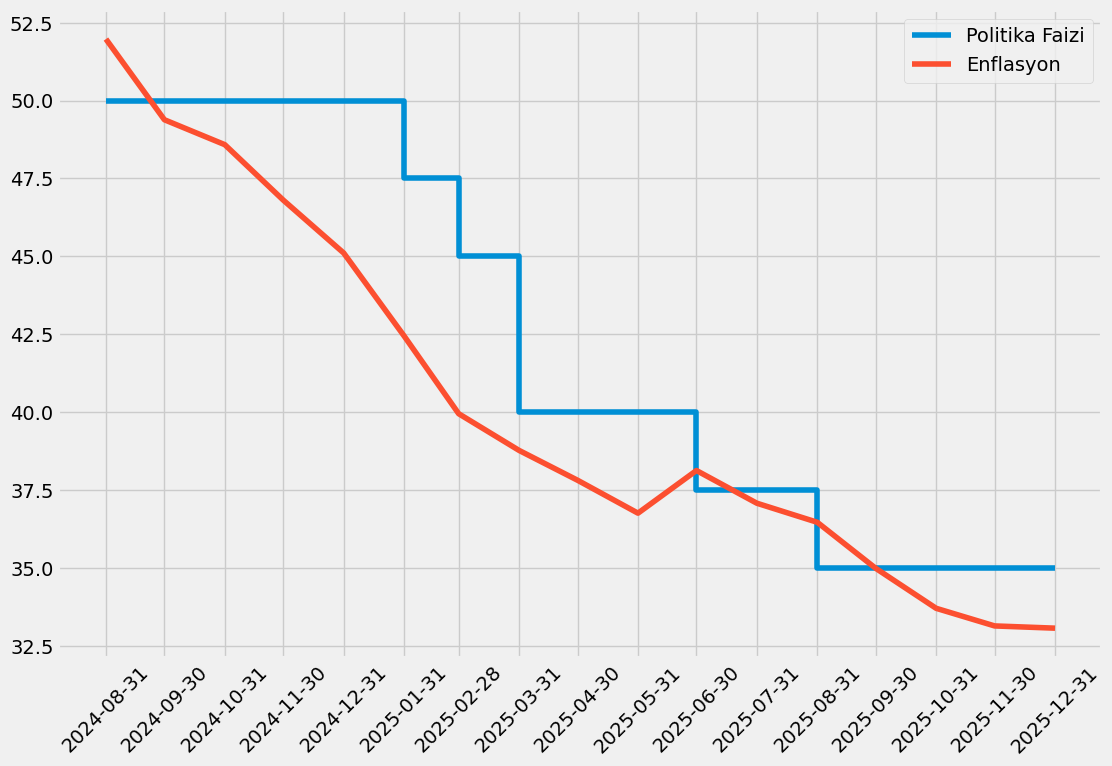

In [96]:
tahmin=tahmin.dropna()
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.step(y=tahmin["Faiz"].dropna(),x=tahmin.dropna().index,where="post",label="Politika Faizi")
plt.plot(tahmin["Ortalama"],label="Enflasyon")
plt.xticks(tahmin.index,rotation=45)
plt.legend()

In [97]:
trainexog=pd.DataFrame()
trainexog["Dolar"]=usd.iloc[-16:-6,0].rolling(2).mean().dropna()*df14.iloc[:-6,0]
trainexog=trainexog.dropna()
trainexog=np.array(trainexog).reshape(-1,1)
testexog=pd.DataFrame()
testexog["Dolar"]=usd.iloc[-7:,0].rolling(2).mean().dropna()*df14.iloc[-6:,0]
testexog=testexog.dropna()
testexog=np.array(testexog).reshape(-1,1)

In [98]:
exog=pd.DataFrame()
exog["X"]=usd["USD/TL"].rolling(2).mean().dropna()*df14["Brent"]
exog=exog.dropna()
exog
#exog=np.array(exog).reshape(-1,1)


,X
2007-07-31,99.454046
2007-08-31,92.519699
2007-09-30,99.580871
2007-10-31,101.824103
2007-11-30,110.143119
...,...
2024-07-31,2738.228154
2024-08-31,2623.214664
2024-09-30,2457.059505
2024-10-31,2572.730439


In [99]:

zamtahmin=pd.DataFrame()
zamtahmin["Zam"]=[0,0,0,0,0,49.11,0,0,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,25,0,0,0]
zamtahmin.columns=["Zam"]
zamtahmin=zamtahmin.set_index(pd.date_range(start="2023-08-30",end="2026-04-30",freq="1M"))
zamtahmin

,Zam
2023-08-31,0.00
2023-09-30,0.00
2023-10-31,0.00
2023-11-30,0.00
2023-12-31,0.00
2024-01-31,49.11
2024-02-29,0.00
2024-03-31,0.00
2024-04-30,0.00
2024-05-31,0.00


In [100]:
exogtrain=pd.DataFrame()
exogtrain["Faiz"]=pfaiz["Faiz"].iloc[95:-13]
exogtrain=np.array(exogtrain).reshape(-1,1)

exogtest=pd.DataFrame()
exogtest=pd.concat([pfaiz["Faiz"].iloc[-14:-3],faiztahmin.iloc[2:,0]],axis=0)
exogtest=np.array(exogtest).reshape(-1,1)



In [101]:
exog=pfaiz["Faiz"].iloc[36:-2]
exog=np.array(exog).reshape(-1,1)

In [102]:
exogtest=faiztahmin.iloc[2:]
exogtest=np.array(exogtest).reshape(-1,1)

In [103]:
model=auto_arima(issizlik,seasonal=True,m=3,X=exog)
model_fit = model.fit(issizlik,X=exog)
issizliktahmin = model_fit.predict(27,X=exogtest)
issizliktahmin=pd.DataFrame(issizliktahmin)
issizliktahmin.columns=["İşsizlik"]
issizliktahmin

,İşsizlik
2024-10-31,8.525923
2024-11-30,8.486227
2024-12-31,8.486956
2025-01-31,8.494310
2025-02-28,8.509972
2025-03-31,8.557456
2025-04-30,8.554165
2025-05-31,8.552550
2025-06-30,8.576248
2025-07-31,8.575584


In [104]:
from prophet import Prophet

In [105]:
import optuna


In [106]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.01, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.50,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=usd.index
    sn["y"]=usd.values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"])
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=500,freq="D")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(usd.values,predictions["yhat"][:-500])
    return mae_score
try:
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1000)
    print("Optimize işlemi başarıyla tamamlandı.")
except Exception as e:
    print(f'Hata oluştu: {e}')
    print('Optimize işlemi başarısız oldu. Devam ediyor...')
"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.01, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.50,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=usd.index\n    sn["y"]=usd.values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],sea

In [107]:
"""study.best_params"""

'study.best_params'

In [108]:
sn=pd.DataFrame()
sn["ds"]=usd.index
sn["y"]=usd.values
prophet=Prophet(growth="linear",changepoint_prior_scale=5.828175414699565,changepoint_range=0.6,seasonality_prior_scale=7.816953755754968,n_changepoints=100,interval_width=0.70,yearly_seasonality=False,weekly_seasonality="auto")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=500,freq="D")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

09:49:20 - cmdstanpy - INFO - Chain [1] start processing
09:49:21 - cmdstanpy - INFO - Chain [1] done processing


In [109]:
usdtahmin=(predictions["yhat"].resample('M').mean().tail(19).pct_change()*100).dropna()
usdtahmin

ds
2024-11-30    1.171154
2024-12-31    0.617385
2025-01-31    1.188844
2025-02-28    1.118028
2025-03-31    1.105666
2025-04-30    1.130645
2025-05-31    1.118004
2025-06-30    1.105643
2025-07-31    1.093552
2025-08-31    1.099456
2025-09-30    1.069959
2025-10-31    1.058632
2025-11-30    1.047543
2025-12-31    1.036683
2026-01-31    1.042867
2026-02-28    0.982163
2026-03-31    0.972610
2026-04-30    0.734676
Freq: ME, Name: yhat, dtype: float64

In [110]:
usd_aylık=usd.resample('M').mean().dropna()

In [111]:
usdtahmin1 = []
result = usd_aylık.iloc[-1,0]
for i in range(len(usdtahmin)):
    result *= (1 + usdtahmin[i] / 100)
    usdtahmin1.append(result)

usdtahmin1 = np.array(usdtahmin1).reshape(-1, 1)
usdtahmin1 = pd.DataFrame(usdtahmin1)
usdtahmin1.columns = ["USD/TL"]
usdtahmin1=pd.concat([usd_aylık["USD/TL"].loc["2024-03-31":"2024-10-31"],usdtahmin1],axis=0)
usdtahmin1 = usdtahmin1.set_index(pd.date_range(start="2024-03-31", periods=len(usdtahmin1), freq="1M"))
usdtahmin1

,USD/TL
2024-03-31,31.986743
2024-04-30,32.329467
2024-05-31,32.247882
2024-06-30,32.521235
2024-07-31,32.894495
2024-08-31,33.621248
2024-09-30,34.030467
2024-10-31,34.232582
2024-11-30,34.794840
2024-12-31,35.009658


In [112]:
import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'growth':trial.suggest_categorical('growth',['linear'])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df14[50:].index
    sn["y"]=df14[50:].values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"][-13:],predictions["yhat"][-26:-13])
    return mae_score
"""study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

"study = optuna.create_study(direction='minimize')\nstudy.optimize(objective, n_trials=1000)"

In [113]:
sn=pd.DataFrame()
sn["ds"]=df14.index
sn["y"]=df14.values
prophet=Prophet(growth="linear",changepoint_prior_scale=0.95,changepoint_range=0.95,seasonality_prior_scale=5.378940289163559,n_changepoints=100)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

09:49:21 - cmdstanpy - INFO - Chain [1] start processing
09:49:22 - cmdstanpy - INFO - Chain [1] done processing


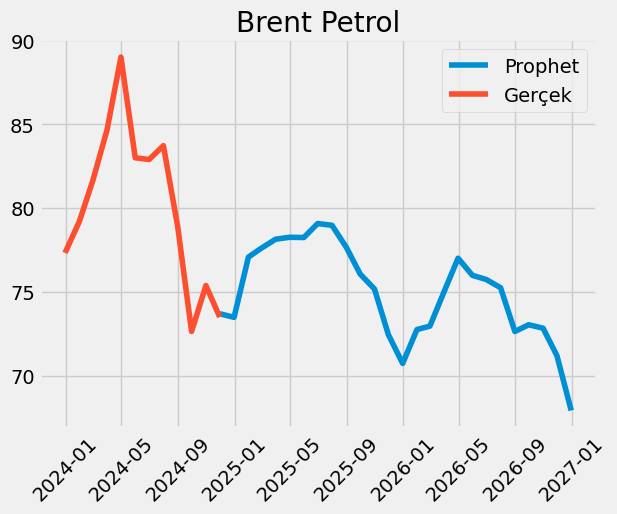

In [114]:
plt.title("Brent Petrol")
plt.plot(predictions["yhat"][-26:],label="Prophet")
plt.plot(df14["Brent"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [115]:
brenttahmin=predictions["yhat"].iloc[-29:]
brenttahmin

ds
2024-08-31    82.691041
2024-09-30    79.137231
2024-10-31    77.544874
2024-11-30    73.693431
2024-12-31    73.479420
2025-01-31    77.071411
2025-02-28    77.603723
2025-03-31    78.137404
2025-04-30    78.253285
2025-05-31    78.239624
2025-06-30    79.072172
2025-07-31    78.966604
2025-08-31    77.657334
2025-09-30    76.060803
2025-10-31    75.170011
2025-11-30    72.454143
2025-12-31    70.732125
2026-01-31    72.751520
2026-02-28    72.957026
2026-03-31    75.029802
2026-04-30    77.004669
2026-05-31    75.984312
2026-06-30    75.735086
2026-07-31    75.245934
2026-08-31    72.636137
2026-09-30    73.037488
2026-10-31    72.833073
2026-11-30    71.199144
2026-12-31    67.925572
Name: yhat, dtype: float64

In [116]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'growth':trial.suggest_categorical('growth',['linear'])

            

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=enf_belirsizlik.index
    sn["y"]=enf_belirsizlik.values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n\n            \n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=enf_belirsizlik.index\n    sn["y"]=enf_belirsizlik.values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = o

09:49:22 - cmdstanpy - INFO - Chain [1] start processing
09:49:22 - cmdstanpy - INFO - Chain [1] done processing


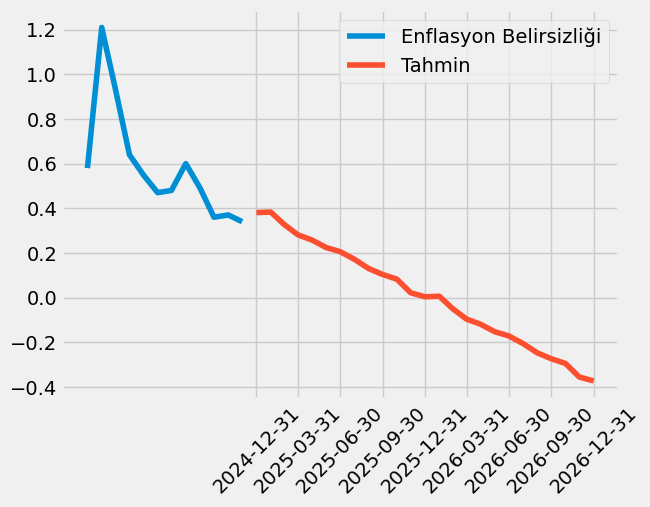

In [117]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
prophet=Prophet(changepoint_prior_scale=10,changepoint_range=0.82,seasonality_prior_scale=0.003403857042852,n_changepoints=6,growth="linear")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])
plt.plot(enf_belirsizlik[-12:],label="Enflasyon Belirsizliği")
plt.plot(predictions["yhat"][-25:],label="Tahmin")
plt.xticks(predictions.index[-25::3],rotation=45)
plt.legend()

In [118]:
enfbelirsizliktahmin1=pd.DataFrame(predictions["yhat"][-26:])
enfbelirsizliktahmin1.columns=["Enflasyon Belirsizliği"]
enfbelirsizliktahmin1.index.names=[""]
enfbelirsizliktahmin1.iloc[0,0]=enf_belirsizlik.iloc[-1,0]
enfbelirsizliktahmin1

,Enflasyon Belirsizliği
,
2024-11-30,0.340000
2024-12-31,0.380503
2025-01-31,0.383069
2025-02-28,0.329121
2025-03-31,0.280704
2025-04-30,0.258041
2025-05-31,0.223956
2025-06-30,0.205786
2025-07-31,0.171602


In [119]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',[0.01,10]),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].index
    sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],predictions["yhat"].tail(12))
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',[0.01,10]),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][p

In [120]:
#study.best_params

In [121]:
brenttahmin1=(brenttahmin.pct_change()*100).dropna()
brenttahmin1

ds
2024-09-30   -4.297696
2024-10-31   -2.012148
2024-11-30   -4.966727
2024-12-31   -0.290408
2025-01-31    4.888432
2025-02-28    0.690673
2025-03-31    0.687700
2025-04-30    0.148304
2025-05-31   -0.017457
2025-06-30    1.064100
2025-07-31   -0.133509
2025-08-31   -1.658005
2025-09-30   -2.055866
2025-10-31   -1.171159
2025-11-30   -3.612966
2025-12-31   -2.376700
2026-01-31    2.854990
2026-02-28    0.282476
2026-03-31    2.841092
2026-04-30    2.632110
2026-05-31   -1.325059
2026-06-30   -0.327996
2026-07-31   -0.645873
2026-08-31   -3.468356
2026-09-30    0.552551
2026-10-31   -0.279877
2026-11-30   -2.243389
2026-12-31   -4.597770
Name: yhat, dtype: float64

In [122]:
motorintahmin=pd.DataFrame((1+(((usdtahmin1[5:-1].pct_change(periods=1)*100).dropna())/100)).values*(1+(((brenttahmin1.loc[:"2026-03-31"]).dropna())/100)).values.reshape(-1,1))
motorintahmin.columns=["Motorin"]
motorintahmin=motorintahmin.set_index(pd.date_range(start="2024-09-30",periods=len(motorintahmin),freq="1M"))
motorintahmin=(motorintahmin-1)*100
motorintahmin

,Motorin
2024-09-30,-3.132861
2024-10-31,-1.430174
2024-11-30,-3.405840
2024-12-31,0.325184
2025-01-31,6.135391
2025-02-28,1.816423
2025-03-31,1.800970
2025-04-30,1.280626
2025-05-31,1.100352
2025-06-30,2.181509


In [123]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=money["Para Arzi"].index
    sn["y"]=money["Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(money["Para Arzi"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=money["Para Arzi"].index\n    sn["y"]=money["Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_rang

In [124]:
sn=pd.DataFrame()
sn["ds"]=money["Para Arzi"].index
sn["y"]=money["Para Arzi"].values
prophet=Prophet(changepoint_prior_scale=0.904897796889,changepoint_range=0.9529543315216538,growth='linear',seasonality_prior_scale=3.03031163229546,n_changepoints=15)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

09:49:23 - cmdstanpy - INFO - Chain [1] start processing
09:49:23 - cmdstanpy - INFO - Chain [1] done processing


In [125]:
paraarzitahmin=(predictions["yhat"]).tail(25)
paraarzitahmin

ds
2024-12-31    2.577137
2025-01-31    1.068809
2025-02-28    1.391611
2025-03-31    3.052030
2025-04-30    2.558814
2025-05-31    2.126777
2025-06-30    2.503614
2025-07-31    1.660077
2025-08-31    1.864560
2025-09-30    1.712793
2025-10-31    1.336137
2025-11-30    1.431769
2025-12-31    2.134138
2026-01-31    0.226041
2026-02-28    0.786715
2026-03-31    2.175930
2026-04-30    1.120300
2026-05-31    1.325079
2026-06-30    1.933902
2026-07-31    0.610534
2026-08-31    1.747944
2026-09-30    0.528966
2026-10-31    0.079022
2026-11-30    0.375937
2026-12-31    1.698103
Name: yhat, dtype: float64

In [126]:
paraarzitahmin1 = paraarzitahmin
paraarzitahmin1 = np.array(paraarzitahmin1).reshape(-1, 1)
paraarzitahmin1 = pd.DataFrame(paraarzitahmin1)
paraarzitahmin1.columns = ["Para Arzi"]
paraarzitahmin1 = paraarzitahmin1.set_index(pd.date_range(start="2024-12-31", periods=len(paraarzitahmin), freq="1M"))
row=pd.DataFrame({"Para Arzi":money.iloc[-6:,0]},index=pd.date_range(start="2024-06-30",periods=6,freq="M"))
paraarzitahmin1=pd.concat([row,paraarzitahmin1])
np.cumprod(1+(paraarzitahmin1.loc["2024-01-31":"2024-12-31"])/100)

,Para Arzi
2024-06-30,1.030171
2024-07-31,1.055102
2024-08-31,1.095613
2024-09-30,1.115376
2024-10-31,1.123058
2024-11-30,1.146911
2024-12-31,1.176468


In [127]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=borc["Borç"][params["m"]:-12].index
    sn["y"]=borc["Borç"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(borc["Borç"][-12:],predictions["yhat"][-12:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=borc["Borç"][params["m"]:-12].index\n    sn["y"]=borc["Borç

In [128]:
#study.best_params

In [129]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,5),
                'n_changepoints':trial.suggest_int('n_changepoints',1,200),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),


                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df3["Kredi"].index
    sn["y"]=df3["Kredi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df3.values,predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,5),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,200),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df3["Kredi"].index\n    sn["y"]=df3["Kredi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=

In [130]:
"""study.best_params"""

'study.best_params'

In [131]:
sn=pd.DataFrame()
sn["ds"]=kredi["Kredi"].index
sn["y"]=kredi["Kredi"].values
prophet=Prophet(changepoint_prior_scale=0.01099759561372614,changepoint_range=0.0589785485153,growth="linear",seasonality_prior_scale=0.04157847860739,n_changepoints=10,yearly_seasonality=True,weekly_seasonality=True)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

09:49:24 - cmdstanpy - INFO - Chain [1] start processing
09:49:24 - cmdstanpy - INFO - Chain [1] done processing


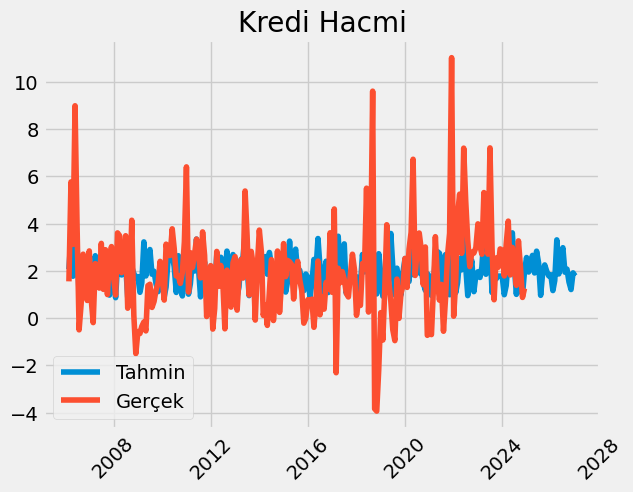

In [132]:
plt.title("Kredi Hacmi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(kredi["Kredi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [133]:
kreditahmin=(predictions["yhat"]).tail(25)
kreditahmin

ds
2024-12-31    2.568700
2025-01-31    1.953851
2025-02-28    2.362976
2025-03-31    2.659952
2025-04-30    1.914358
2025-05-31    2.837919
2025-06-30    2.337383
2025-07-31    0.967924
2025-08-31    1.938875
2025-09-30    2.255047
2025-10-31    1.983919
2025-11-30    1.788950
2025-12-31    1.840009
2026-01-31    1.169664
2026-02-28    1.593480
2026-03-31    3.315719
2026-04-30    1.873103
2026-05-31    2.649277
2026-06-30    2.984686
2026-07-31    1.948323
2026-08-31    2.075251
2026-09-30    1.532389
2026-10-31    1.213742
2026-11-30    1.919758
2026-12-31    1.790730
Name: yhat, dtype: float64

In [134]:
kreditahmin1 = kreditahmin

kreditahmin1 = np.array(kreditahmin1).reshape(-1, 1)
kreditahmin1 = pd.DataFrame(kreditahmin1)
kreditahmin1.columns = ["Kredi"]
kreditahmin1 = kreditahmin1.set_index(pd.date_range(start="2024-12-31", periods=len(kreditahmin1), freq="1M"))
row=pd.DataFrame({"Kredi":kredi.iloc[-4:,0]},index=pd.date_range(start="2024-08-31",periods=4,freq="1M"))
kreditahmin1=pd.concat([row,kreditahmin1],axis=0)
kreditahmin1

,Kredi
2024-08-31,3.273182
2024-09-30,2.186080
2024-10-31,0.878469
2024-11-30,1.257900
2024-12-31,2.568700
2025-01-31,1.953851
2025-02-28,2.362976
2025-03-31,2.659952
2025-04-30,1.914358
2025-05-31,2.837919


In [135]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,150),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=m3["M3"].index
    sn["y"]=m3["M3"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(m3["M3"],predictions["yhat"][:-12])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,150),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=m3["M3"].index\n    sn["y"]=m3["M3"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["

In [136]:
sn=pd.DataFrame()
sn["ds"]=m3["M3"].index
sn["y"]=m3["M3"].values
prophet=Prophet(changepoint_prior_scale=2.5,changepoint_range=0.9,growth='linear',seasonality_prior_scale=4.7636997959024185,n_changepoints=10)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=18,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

09:49:24 - cmdstanpy - INFO - Chain [1] start processing
09:49:24 - cmdstanpy - INFO - Chain [1] done processing


In [137]:
m3tahmin=(predictions["yhat"].tail(18))


m3tahmin1 = np.array(m3tahmin).reshape(-1, 1)
m3tahmin1 = pd.DataFrame(m3tahmin1)
m3tahmin1.columns = ["M3"]
m3tahmin1 = m3tahmin1.set_index(pd.date_range(start="2024-12-31", periods=len(m3tahmin1), freq="1M"))
row=pd.DataFrame({"M3":m3.iloc[-4:,0]},index=pd.date_range(start="2024-08-30",periods=4,freq="1M"))
m3tahmin1=pd.concat([row,m3tahmin1],axis=0)
m3tahmin1

,M3
2024-08-31,4.341284
2024-09-30,2.815464
2024-10-31,1.580657
2024-11-30,1.896500
2024-12-31,2.147314
2025-01-31,1.150106
2025-02-28,1.612693
2025-03-31,3.021888
2025-04-30,2.564252
2025-05-31,2.435688


In [138]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=sanayi["Sanayi"].index
    sn["y"]=sanayi["Sanayi"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=15,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sanayi["Sanayi"],predictions["yhat"][:-15])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=sanayi["Sanayi"].index\n    sn["y"]=sanayi["Sanayi"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(cha

In [139]:
#study.best_params

In [140]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redkt["REDKT"].index
    sn["y"]=redkt["REDKT"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=36,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(redkt["REDKT"],predictions["yhat"][:-36])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_int(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redkt["REDKT"].index\n    sn["y"]=redkt["REDKT"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(changepoint_prior_scal

In [141]:
import statsmodels.api as sm
tahmindf=pd.DataFrame()
tahmindf=pd.concat([usdtahmin1["USD/TL"].rolling(3).mean()],axis=1)

tahmindf=tahmindf.pct_change(periods=1)*100
tahmindf["M3"]=m3tahmin1["M3"].shift(1)
tahmindf["Para Arzi"]=paraarzitahmin1.rolling(3).mean()
tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin1["Enflasyon Belirsizliği"]
tahmindf["Kredi"]=kreditahmin1["Kredi"].shift(1).rolling(2).mean()
tahmindf["Kredi2"]=kreditahmin1["Kredi"].rolling(3).mean()
tahmindf["Zam"]=zamtahmin["Zam"]
tahmindf["Motorin"]=motorintahmin["Motorin"].rolling(2).mean()
tahmindf["Motorin2"]=motorintahmin["Motorin"]
tahmindf["İşsizlik"]=issizliktahmin





tahmindf=tahmindf[['USD/TL', 'Motorin','Motorin2', 'Zam',
       'Enflasyon Belirsizliği', 'Para Arzi', 'M3', 'Kredi','Kredi2','İşsizlik']]

tahmindf.columns=["USD/TL","Motorin","Motorin2","Zam","Enflasyon Belirsizliği",'ParaArzi','M3', 'Kredi','Kredi2','İşsizlik']
tahmindf=tahmindf.loc["2024-11-30":]
enfbelirsizliktahmin=pd.read_excel("enfbelirsizliktahmin.xlsx")
enfbelirsizliktahmin=enfbelirsizliktahmin.set_index("Unnamed: 0")
enfbelirsizliktahmin=enfbelirsizliktahmin.loc["2024-09-30":]
enfbelirsizliktahmin=enfbelirsizliktahmin.set_index(pd.date_range(start="2024-10-31",freq="M",periods=len(enfbelirsizliktahmin)))

tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin["Series"]

tahmindf["USD/TL"].iloc[0]=data["USD/TL"].iloc[-1]
tahmindf["Motorin"].iloc[0]=data["Motorin"].iloc[-1]
tahmindf["ParaArzi"].iloc[0]=data["ParaArzi"].iloc[-1]
tahmindf["M3"].iloc[0]=data["M3"].iloc[-1]
tahmindf["Kredi"].iloc[0]=data["Kredi"].iloc[-1]
tahmindf["Enflasyon Belirsizliği"].iloc[0]=enf_belirsizlik.iloc[-1,0]
tahmindf["Zam"].iloc[-1]=0
tahmindf["Zam"].iloc[2]=30
tahmindf

,USD/TL,Motorin,Motorin2,Zam,Enflasyon Belirsizliği,ParaArzi,M3,Kredi,Kredi2,İşsizlik
2024-11-30,0.756552,0.994636,-3.405840,0.0,0.340000,1.538806,2.097540,1.532275,1.440816,8.486227
2024-12-31,0.950137,-1.540328,0.325184,0.0,0.328252,1.796604,1.896500,1.068185,1.568356,8.486956
2025-01-31,1.146981,3.230288,6.135391,30.0,0.525745,1.923282,2.147314,1.913300,1.926817,8.494310
2025-02-28,0.976048,3.975907,1.816423,0.0,0.410114,1.679186,1.150106,2.261276,2.295176,8.509972
2025-03-31,1.137193,1.808696,1.800970,0.0,0.301573,1.837483,1.612693,2.158414,2.325593,8.557456
2025-04-30,1.118159,1.540798,1.280626,0.0,0.308343,2.334152,3.021888,2.511464,2.312429,8.554165
2025-05-31,1.118150,1.190489,1.100352,0.0,0.287528,2.579207,2.564252,2.287155,2.470743,8.552550
2025-06-30,1.118004,1.640930,2.181509,0.0,0.359421,2.396402,2.435688,2.376139,2.363220,8.576248
2025-07-31,1.105643,1.570046,0.958583,0.0,0.381228,2.096823,2.503182,2.587651,2.047742,8.575584
2025-08-31,1.099528,0.190903,-0.576777,0.0,0.319732,2.009417,1.920608,1.652653,1.748061,8.598927


In [142]:
features=['USD/TL', 'Motorin', 'M3', 'Enflasyon Belirsizliği', 'TÜFEt-1', 'Kredi', 'İhracat', 'İthalat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','Anket','ParaArzi','Zam', 'TÜFE']

data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data




,USD/TL,Motorin,M3,Enflasyon Belirsizliği,TÜFEt-1,Kredi,İhracat,İthalat,İşsizlik,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,Anket,ParaArzi,Zam,TÜFE
0,0.246977,0.047793,-0.282310,-0.547359,0.030842,0.799168,-0.569053,-1.380674,-0.959063,-0.383443,-0.912475,0.371987,-0.726327,-0.665140,-0.231806,-0.283969,-0.668846
1,0.074510,-0.364007,-0.810661,-0.935205,-0.666339,-0.294937,0.285592,-0.653826,-0.959063,0.372396,-0.713995,-0.289280,-0.540318,-0.695192,-0.697632,-0.283969,-0.355418
2,-1.083118,-0.994490,-1.214697,-0.754210,-0.352623,-0.970988,0.865976,1.092703,-0.829527,-0.288761,-0.528441,-0.510483,-0.305248,-0.612548,-1.089196,-0.283969,-0.256833
3,-1.239572,-0.857503,-1.359355,-0.676641,-0.253948,-1.098726,-0.702467,-0.013427,-0.829527,-0.509928,-0.293945,-0.732805,0.131384,-0.710219,-1.308249,-0.283969,-0.683663
4,-1.156361,-0.142125,-0.968051,-0.521503,-0.681169,-0.926769,0.038625,-0.049885,-0.829527,-0.732212,0.141620,-0.939994,-0.160508,-1.018255,-0.955749,-0.283969,-0.721608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-0.497807,0.434180,0.725377,0.202475,-0.120887,0.421137,-1.725754,-1.747012,-1.412438,-0.092620,0.916925,-0.291791,-0.054428,0.897584,0.069023,-0.283969,0.588329
126,-0.247383,0.247421,0.877242,-0.081945,0.591990,-0.065332,1.294471,1.677627,-1.541973,-0.291271,-0.043738,-0.098674,0.289710,0.732295,0.426763,-0.283969,0.250756
127,-0.211630,-0.742383,0.701908,-0.418077,0.254107,0.234990,-0.250980,-0.905919,-1.541973,-0.098187,0.299559,-0.188280,0.544860,0.484363,0.207552,-0.283969,0.472669
128,-0.270290,-0.465140,0.335187,-0.392221,0.476223,0.475842,-0.115852,-0.026777,-1.541973,-0.187539,0.554087,-0.295220,0.819999,0.612086,-0.105229,-0.283969,0.432971


In [143]:
"""import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2,l1
features=['M3','ParaArzi','Enflasyon Belirsizliği','Kredi','İşsizlik']
def weighted_mse(y_true, y_pred):
    n = len(y_true)
    weights = 1 / np.arange(1, n + 1)  # Ters orantılı ağırlıklar
    weights = weights[::-1]  # Ağırlıkları ters çevir (küçükten büyüğe)
    mse = np.sum(weights * (y_true - y_pred) ** 2) / n
    return mse
def objective(trial):
    # Define hyperparameters to be optimized
    selected_features = ["USD/TL","Motorin","Zam"]
    for feature in features:
        if trial.suggest_categorical(feature, (True, False)):
            selected_features.append(feature)

    if len(selected_features) == 0:
        return float('inf')  # Hiçbir özellik seçilmezse, bu deneme geçersiz sayılır
    
    X=scaled_data[selected_features]
    y=scaled_data["TÜFE"]
    X=np.array(X)
    y=np.array(y).reshape(-1,1)
    X=pd.DataFrame(X,columns=selected_features)
    y=pd.DataFrame(y,columns=["TÜFE"])
    X_train,X_test=X.iloc[:-7,:],X.iloc[-7:,:]
    y_train,y_test=y[:-7],y[-7:]
    X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)


    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 256)
    batch_size = trial.suggest_int('batch_size', 2, 64)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','linear'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) 

    

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
    tahminler.columns=["TÜFE"]
    tahminler["Tahmin"]=scaler2.inverse_transform(y_pred)
    tahminler=tahminler.set_index(data.index[-7:])
    tahminler.loc["2024-05-31","Tahmin"]+=0.66
    tahminler.loc["2024-07-31","Tahmin"]+=0.67
    mse=mean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["Tahmin"].iloc[:-1])


    return mse # Return validation accuracy as the objective

study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)"""

'import optuna\nimport tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN\nimport keras\nfrom keras.callbacks import EarlyStopping\nfrom keras import regularizers\nfrom keras.layers import LSTM, Dense, Dropout\nfrom keras.regularizers import l2,l1\nfeatures=[\'M3\',\'ParaArzi\',\'Enflasyon Belirsizliği\',\'Kredi\',\'İşsizlik\']\ndef weighted_mse(y_true, y_pred):\n    n = len(y_true)\n    weights = 1 / np.arange(1, n + 1)  # Ters orantılı ağırlıklar\n    weights = weights[::-1]  # Ağırlıkları ters çevir (küçükten büyüğe)\n    mse = np.sum(weights * (y_true - y_pred) ** 2) / n\n    return mse\ndef objective(trial):\n    # Define hyperparameters to be optimized\n    selected_features = ["USD/TL","Motorin","Zam"]\n    for feature in features:\n        if trial.suggest_categorical(feature, (True, False)):\n            selected_features.append(feature)\n\n    if len(selected_features) == 0:\n        return float(\'i

In [144]:
features=['Enflasyon Belirsizliği', 'Kredi2', 'USD/TL', 'Motorin', 'Zam','ParaArzi','İşsizlik']

data1=data[features]
data1=pd.concat([data1,tahmindf[features]],axis=0)
data1["TÜFE"]=data["TÜFE"]
data1=data1.fillna(0)
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))






In [145]:
trials=pd.read_excel("futuretrial4.xlsx")
del trials["Unnamed: 0"]
predictions=pd.DataFrame()
for i in range(10):
    trial=trials.iloc[i:i+1]
    selected_features=['Enflasyon Belirsizliği', 'Kredi2', 'USD/TL', 'Motorin', 'Zam','ParaArzi','İşsizlik']






    

    X = scaled_data[selected_features]
    y = scaled_data["TÜFE"]
    
    X = np.array(X)
    y = np.array(y).reshape(-1, 1)
    
    X = pd.DataFrame(X, columns=selected_features)
    y = pd.DataFrame(y, columns=["TÜFE"])
    
    X_train, X_test = X.iloc[:-27, :], X.iloc[-18:, :]
    y_train, y_test = y[:-27], y[-18:]
    
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    



    units=int(trial["params_units1"].values[0])
    activation=trial["params_activation1"].values[0]
    rl=trial["params_rlrate"].values[0]
    lr=trial["params_learning_rate"].values[0]
    batch=int(trial["params_batch_size"].values[0])
    
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    """model = Sequential()   
    model.add(Dense(units=units,activation=activation,input_dim=(X_train.shape[1])))
    model.add(Dropout(rl))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=batch,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))"""
    model = keras.models.load_model(f"future_{i}.keras")
   


    pred=scaler2.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["TÜFE"]
    pred=pred.set_index(pd.date_range(start="2024-11-30",periods=len(tahmindf),freq="1M"))
    pred.iloc[0]=kısatahminler["Ortalama"].iloc[-1]
    predictions=pd.concat([predictions,pred["TÜFE"]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [146]:
def create_tüfe(data):
    tüfetahmin = []
    result = enf["TÜFE"].iloc[-1]
    pred=np.array(data.values).reshape(1,-1).ravel()
    for i in range(len(pred)):
        result *= (1 + (pred[i] / 100))
        tüfetahmin.append(result)
    tüfetahmin[0]=enf["TÜFE"].iloc[-1]*(1+(data[0]/100))

    tüfetahmin = np.array(tüfetahmin).reshape(-1, 1)
    tüfetahmin = pd.DataFrame(tüfetahmin)
    tüfetahmin = tüfetahmin.set_index(pd.date_range(start="2024-11-30", periods=len(tüfetahmin), freq="1M"))
    return tüfetahmin


In [147]:
tüfetahmin_dict={}
for i in range(len(predictions.columns)):
    # Dinamik olarak bir sözlük içinde tahminleri saklıyoruz.
    tüfetahmin_dict[f"tüfetahmin_{i}"] = create_tüfe(predictions.iloc[:, i])
    # Kolon adını güncelleme
    tüfetahmin_dict[f"tüfetahmin_{i}"].columns = [f"NN_{i}"]



tüfetahmin=pd.concat(tüfetahmin_dict.values(), axis=1)
std=tüfetahmin.std(axis=1)
predictions.columns=tüfetahmin.columns

In [148]:
predictions=predictions.drop("NN_1",axis=1)
predictions=predictions.drop("NN_9",axis=1)
predictions=predictions.drop("NN_7",axis=1)

tüfetahmin=tüfetahmin.drop("NN_1",axis=1)
tüfetahmin=tüfetahmin.drop("NN_9",axis=1)
tüfetahmin=tüfetahmin.drop("NN_7",axis=1)

In [149]:
dates=pd.date_range('2006-02-28','2024-03-28' , freq='1M')
df=pd.DataFrame()

df["CPI"]=enf["TÜFE"]
df=df.set_index(pd.to_datetime(enf.index))


std=tüfetahmin.std(axis=1)

dfas1=pd.DataFrame()
dfas1=pd.concat([df["CPI"],tüfetahmin.mean(axis=1)],axis=0)
dfas1=pd.DataFrame(dfas1)
dfas1.columns=["Ortalama"]


dfas2=pd.DataFrame()
dfas2=pd.concat([df["CPI"],tüfetahmin.max(axis=1)+(0.5*std)],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=["Max"]

dfas3=pd.DataFrame()
dfas3=pd.concat([df["CPI"],tüfetahmin.min(axis=1)],axis=0)
dfas3=pd.DataFrame(dfas3)
dfas3.columns=["Min"]
dfas3["Min"].loc["2024-11-30":]-=(std.loc["2024-11-30":])

dfas0=pd.DataFrame()
for i in range(tüfetahmin.shape[1]):
    dfas00=pd.DataFrame()
    dfas00=pd.concat([df["CPI"],tüfetahmin.iloc[:,i]],axis=0)
    dfas00=pd.DataFrame(dfas00)
    dfas00.columns=[f"NN_{i}"]
    dfas0=pd.concat([dfas0,dfas00],axis=1)



dfas=pd.DataFrame()
dfas=pd.concat([dfas1,dfas0],axis=1)
dfas=dfas.dropna(axis=0)

dfas["Ortalama"]=dfas.mean(axis=1)
dfas["Max"]=dfas2["Max"]
dfas["Min"]=dfas3["Min"]
dfas=dfas.pct_change(periods=12)*100
df["Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.dropna(axis=0)







In [150]:
dfas["Ortalama"].to_excel("tüfetahmin.xlsx",index=True)

In [151]:

predictions["Ortalama"]=predictions.mean(axis=1)

In [152]:
std=predictions.iloc[:,:-1].std(axis=1)

In [153]:
sonu12024=str(dfas["Ortalama"].loc["2024-12-31"])[:5]
min2024=str(dfas["Min"].loc["2024-12-31"]-1)[:5]
max2024=str(dfas["Max"].loc["2024-12-31"]+1)[:5]

In [154]:
min2025=str(dfas["Min"].loc["2025-12-31"]-1)[:5]
max2025=str(dfas["Max"].loc["2025-12-31"]+1)[:5]

In [155]:
params = {
    'series': "TP.PKAUO.S01.D.U",
    'startDate': "01-11-2024",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ay12sonra = formatted_response['items']
ay12sonra = pd.DataFrame(ay12sonra)


ay12sonra = ay12sonra.drop(columns=['UNIXTIME','Tarih'])
ay12sonra.columns = ['Beklenti']
ay12sonra['Beklenti'] = pd.to_numeric(ay12sonra['Beklenti'])
ay12sonra=ay12sonra.set_index(pd.date_range(start="2024-10-01",freq="M",periods=len(ay12sonra)))
ay12sonra=ay12sonra.dropna()
ay12sonra

,Beklenti
2024-10-31,44.81


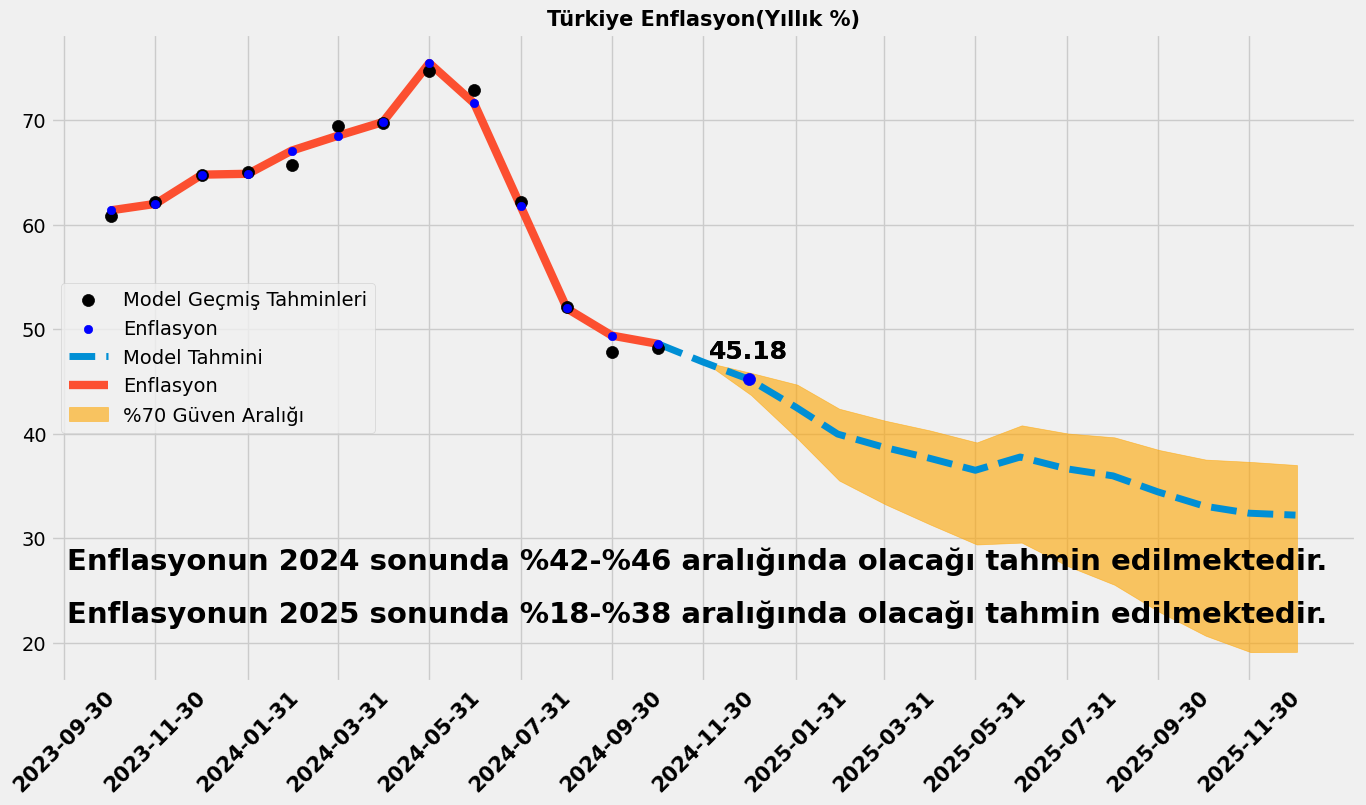

In [156]:
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(15,8))
geçmiş=pd.DataFrame({"Tahmin":[61.94,60.84,62.13,64.71,65.06,65.73,69.47,69.69,74.65,72.87,62.17,52.07,47.82,48.20]})
geçmiş=geçmiş.set_index(pd.date_range(start="2023-09-30",periods=len(geçmiş),freq="M"))
plt.scatter(x=geçmiş["Tahmin"].loc["2023-10-31":].index,y=geçmiş["Tahmin"].loc["2023-10-31":],label="Model Geçmiş Tahminleri",color="black",zorder=3,s=75)
plt.scatter(x=dfas["Ortalama"].loc["2023-10-31":"2024-10-31"].index,y=dfas["Ortalama"].loc["2023-10-31":"2024-10-31"],label="Enflasyon",color="blue",zorder=3)
plt.scatter(x=dfas.loc["2024-12-31":].index[0],y=dfas["Ortalama"].loc["2024-12-31"],color='blue',zorder=4,s=75)
plt.plot(dfas["Ortalama"].loc["2024-10-31":"2025-12-31"],'--',label="Model Tahmini",linewidth=5)
plt.plot(dfas["Ortalama"].loc["2023-10-31":"2024-10-31"],label="Enflasyon",linewidth=6)
plt.fill_between(dfas.loc["2024-11-30":"2026-01-31"].index.strftime("%Y-%m"), dfas["Max"].loc["2024-11-30":"2026-01-31"].shift(1), dfas["Min"].loc["2024-11-30":"2026-01-31"].shift(1), alpha=0.6, color='orange',label="%70 Güven Aralığı")
annotation_date = mdates.datestr2num('2024-11')
plt.text(mdates.datestr2num('2025-01'), float(sonu12024)+2, sonu12024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 27, f"Enflasyonun 2024 sonunda %{min2024[:2]}-%{max2024[:2]} aralığında olacağı tahmin edilmektedir.", fontsize=21, color='black', horizontalalignment='center',fontweight='bold')

annotation_date = mdates.datestr2num('2024-11')
plt.text(mdates.datestr2num('2025-01'), float(sonu12024)+2, sonu12024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 22, f"Enflasyonun 2025 sonunda %{min2025[:2]}-%{max2025[:2]} aralığında olacağı tahmin edilmektedir.", fontsize=21, color='black', horizontalalignment='center',fontweight='bold')

plt.xticks(dfas.loc["2023-09-30":"2025-12-31"].index[::2],rotation=45,fontsize=15,fontweight="bold")
plt.title("Türkiye Enflasyon(Yıllık %)",fontsize=15,fontweight="bold")
plt.legend(loc=6)
plt.savefig('forecast.png', bbox_inches='tight')
plt.savefig("./forecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()

In [157]:
modelaylık=kısatahminler.iloc[-1:,1:-2]
modelaylık["Ortalama"]=kısatahminler["Ortalama"].iloc[-1]
modelaylık["Ensemble"]=kısatahminler["Ensemble"].iloc[-1]
modelaylık

,NN1,NN2,NN3,NN4,NN5,Ortalama,Ensemble
2024-11-30,2.056635,2.082517,2.165046,2.265145,1.821331,2.078135,2.074734


In [158]:
predictions["Max"]=predictions.max(axis=1)+std
predictions["Min"]=predictions.min(axis=1)-(0.5*std)
predictions["Max"].iloc[0]=modelaylık.iloc[:,:-2].max(axis=1)+modelaylık.iloc[:,:-2].std(axis=1)
predictions["Min"].iloc[0]=modelaylık.iloc[:,:-2].min(axis=1)-modelaylık.iloc[:,:-2].std(axis=1)


In [159]:

aylık=pd.concat([data["TÜFE"][:-1],predictions["Ortalama"]],axis=0)
aylık=pd.DataFrame(aylık)
aylık.columns=["Aylık"]
aylık["Max"]=predictions["Max"]
aylık["Min"]=predictions["Min"]
predictions=predictions.set_index(aylık.loc["2024-11-30":"2026-04-30"].index)
aylık

,Aylık,Max,Min
2014-02-28,0.428192,NaN,NaN
2014-03-31,1.125608,NaN,NaN
2014-04-30,1.344970,NaN,NaN
2014-05-31,0.395224,NaN,NaN
2014-06-30,0.310791,NaN,NaN
...,...,...,...
2025-12-31,1.611994,2.137297,0.899345
2026-01-31,3.604390,4.923083,2.685537
2026-02-28,1.766751,2.482691,0.758070
2026-03-31,1.717830,2.372453,0.907825


In [160]:
aylık.to_csv("C:/Users/Bora/Documents/GitHub/streamlit-inflation/aylık.csv")

In [161]:
modelaylık.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/modelaylık.csv')

In [162]:
yıllıktahmin1=dfas


yıllıktahmin1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2023-09'),
  Text(1, 0, '2023-10'),
  Text(2, 0, '2023-11'),
  Text(3, 0, '2023-12'),
  Text(4, 0, '2024-01'),
  Text(5, 0, '2024-02'),
  Text(6, 0, '2024-03'),
  Text(7, 0, '2024-04'),
  Text(8, 0, '2024-05'),
  Text(9, 0, '2024-06'),
  Text(10, 0, '2024-07'),
  Text(11, 0, '2024-08'),
  Text(12, 0, '2024-09'),
  Text(13, 0, '2024-10')])

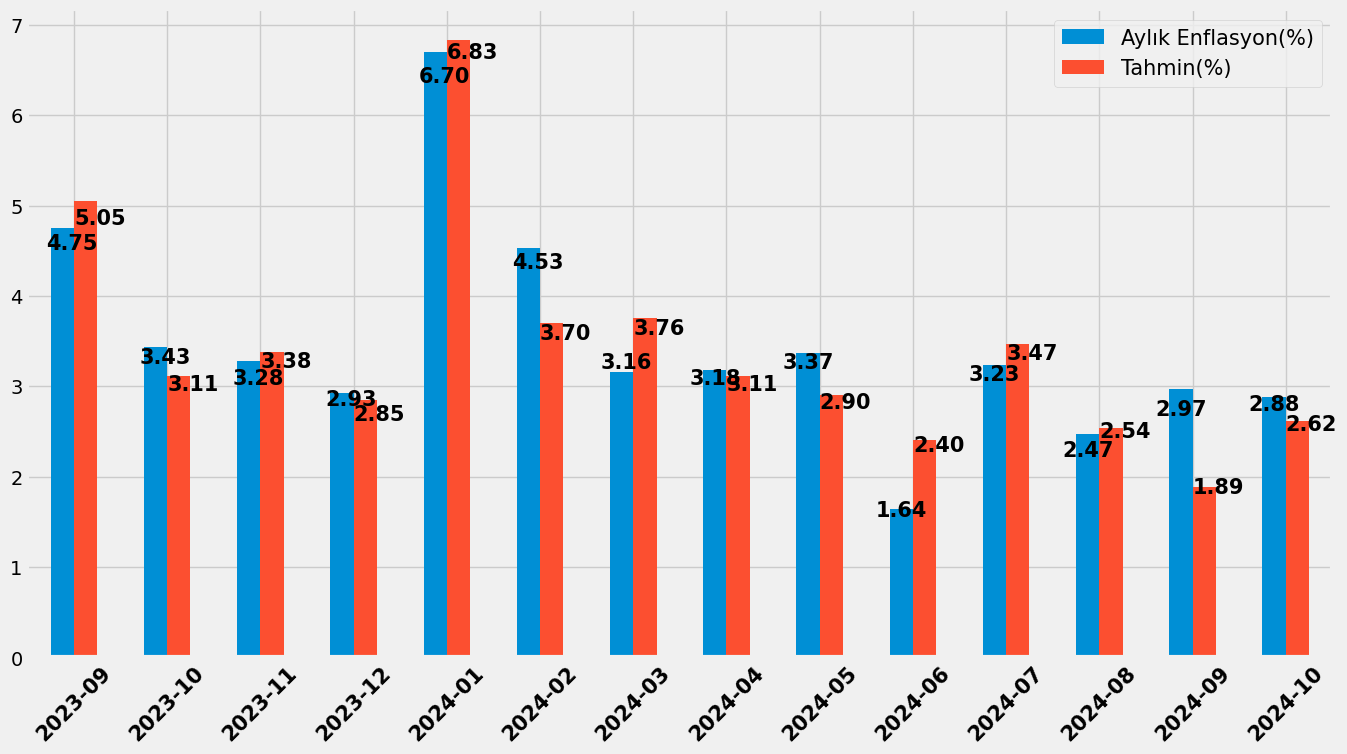

In [163]:
import matplotlib.axes as ax
gecmis=pd.DataFrame({"Aylık Enflasyon(%)":[4.75,3.43,3.28,2.93,6.70,4.53,3.16,3.18,3.37,1.64,3.23,2.47,2.97,2.88],"Tahmin(%)":[5.05,3.11,3.38,2.85,6.83,3.70,3.76,3.11,2.90,2.40,3.47,2.54,1.89,2.62]})
gecmis=gecmis.set_index(pd.date_range(start="2023-09-30",periods=len(gecmis),freq="M"))
gecmis=gecmis.set_index(gecmis.index.strftime("%Y-%m"))
gecmis.plot(kind="bar",figsize=(15,8))
plt.annotate("4.75",xy=(-0.3,gecmis.iloc[0,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("5.05",xy=(0,gecmis.iloc[0,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.43",xy=(0.7,gecmis.iloc[1,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(1,gecmis.iloc[1,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.28",xy=(1.7,gecmis.iloc[2,0]*0.92),fontweight="bold",fontsize=15)
plt.annotate("3.38",xy=(2,gecmis.iloc[2,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.93",xy=(2.7,gecmis.iloc[3,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.85",xy=(3,gecmis.iloc[3,1]*0.92),fontweight="bold",fontsize=15)
plt.annotate("6.70",xy=(3.7,gecmis.iloc[4,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.83",xy=(4,gecmis.iloc[4,1]*0.97),fontweight="bold",fontsize=15)
plt.annotate("4.53",xy=(4.7,gecmis.iloc[5,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.70",xy=(5,gecmis.iloc[5,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.16",xy=(5.65,gecmis.iloc[6,1]*0.85),fontweight="bold",fontsize=15)
plt.annotate("3.76",xy=(6,gecmis.iloc[6,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.18",xy=(6.6,gecmis.iloc[7,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(7,gecmis.iloc[7,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.37",xy=(7.6,gecmis.iloc[8,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.90",xy=(8,gecmis.iloc[8,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("1.64",xy=(8.6,gecmis.iloc[9,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.40",xy=(9,gecmis.iloc[9,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.23",xy=(9.6,gecmis.iloc[10,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.47",xy=(10,gecmis.iloc[10,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.47",xy=(10.6,gecmis.iloc[11,0]*0.90),fontweight="bold",fontsize=15)
plt.annotate("2.54",xy=(11,gecmis.iloc[11,1]*0.96),fontweight="bold",fontsize=15)
plt.annotate("2.97",xy=(11.6,gecmis.iloc[12,0]*0.90),fontweight="bold",fontsize=15)
plt.annotate("1.89",xy=(12,gecmis.iloc[12,1]*0.96),fontweight="bold",fontsize=15)
plt.annotate("2.88",xy=(12.6,gecmis.iloc[13,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.62",xy=(13,gecmis.iloc[13,1]*0.96),fontweight="bold",fontsize=15)

plt.legend(fontsize=15)
plt.xticks(rotation=45,fontweight="bold",fontsize=15,color="black")

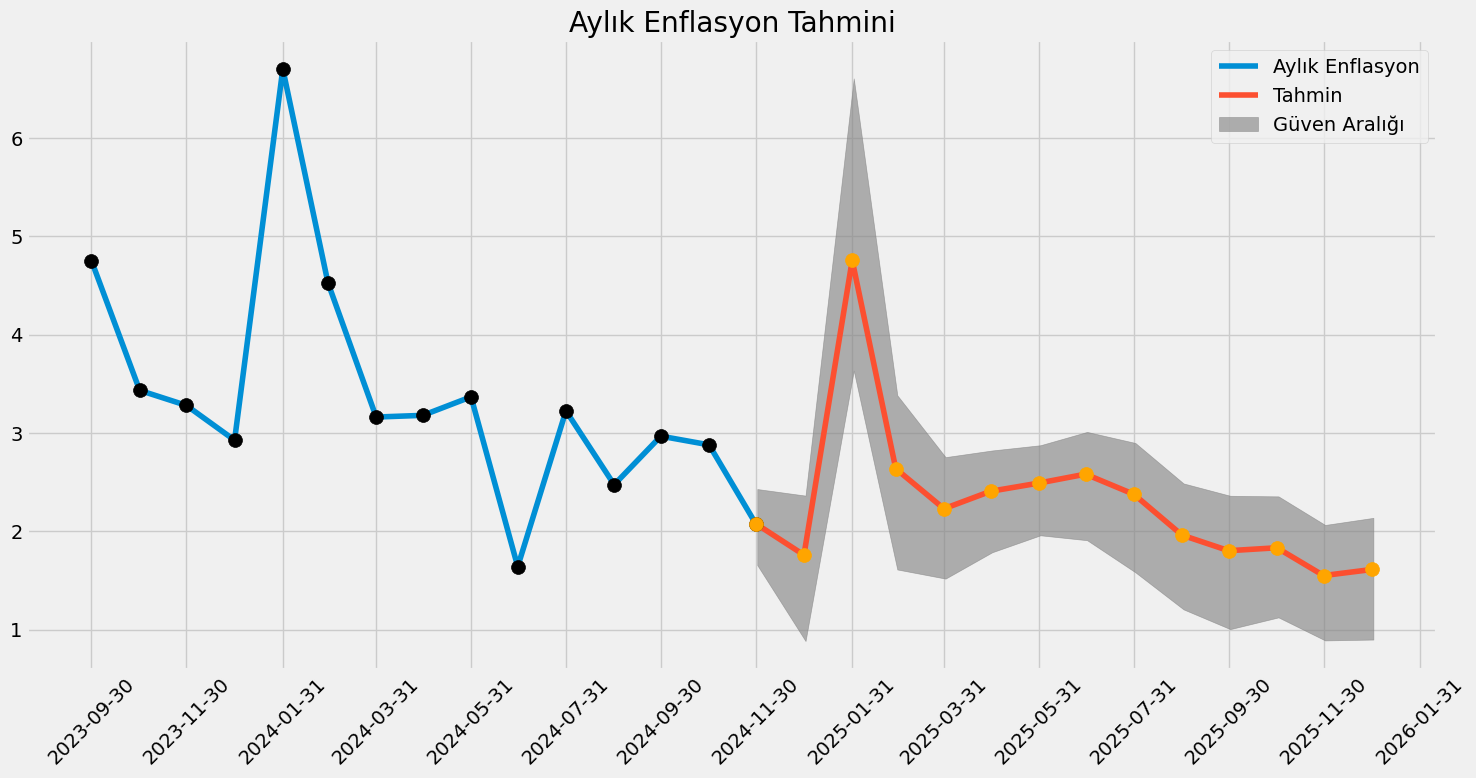

In [165]:
plt.figure(figsize=(15,8))
plt.title("Aylık Enflasyon Tahmini")
plt.plot(aylık["Aylık"].loc["2023-09-30":"2024-11-30"],label="Aylık Enflasyon")
plt.plot(predictions["Ortalama"].loc["2024-11-30":"2025-12-31"],label="Tahmin")
plt.scatter(x=aylık.loc["2023-09-30":"2024-11-30"].index,y=aylık["Aylık"].loc["2023-09-30":"2024-11-30"],color="black",s=100,zorder=3)
plt.scatter(x=predictions["Ortalama"].loc["2024-11-30":"2025-12-31"].index,y=predictions["Ortalama"].loc["2024-11-30":"2025-12-31"],color="orange",s=100,zorder=3)
plt.fill_between(predictions.loc["2024-11-30":"2026-01-31"].index.strftime("%Y-%m"), predictions["Max"].loc["2024-11-30":"2026-01-31"].shift(1), predictions["Min"].loc["2024-11-30":"2026-01-31"].shift(1), alpha=0.6, color='gray',label="Güven Aralığı")

plt.xticks(aylık.loc["2023-09-30":].index[:-3:2],rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("./monthlyCIforecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()

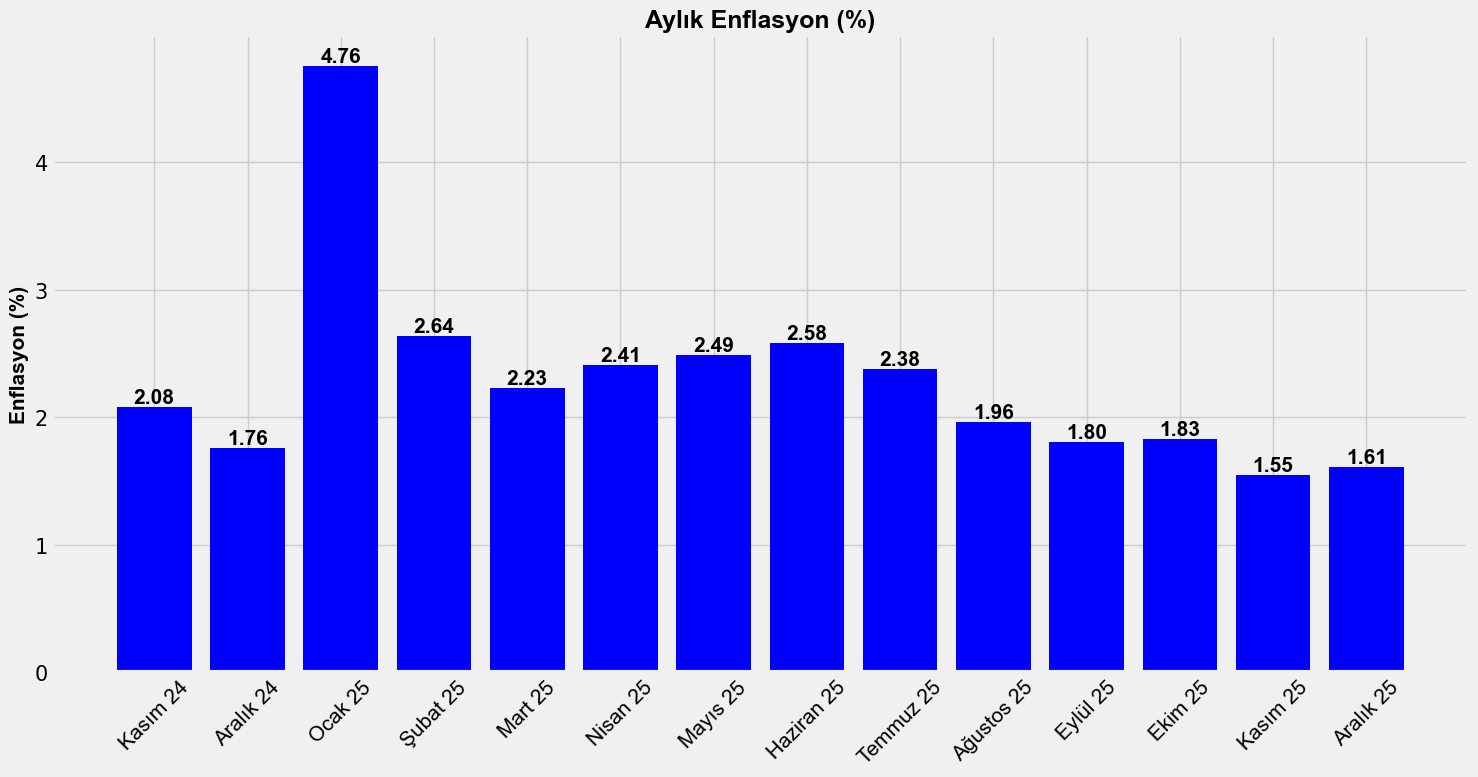

In [166]:

turkish_months = [  "Kasım 24", "Aralık 24", "Ocak 25", "Şubat 25",
    "Mart 25", "Nisan 25", "Mayıs 25", "Haziran 25", "Temmuz 25", "Ağustos 25",
    "Eylül 25", "Ekim 25", "Kasım 25", "Aralık 25"
]

# Çubuk grafiği oluşturma
fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(
    turkish_months,
    aylık["Aylık"].loc["2024-11-30":"2025-12-31"],
    color='blue'
)

# Barların üstüne değerleri yazma
for bar, value in zip(bars, aylık["Aylık"].loc["2024-11-30":"2025-12-31"]):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X pozisyonu (barın ortası)
        bar.get_height(),  # Y pozisyonu (barın yüksekliği)
        f'{value:.2f}',  # Yazılacak metin (2 ondalık basamak)
        ha='center',  # Metni ortala
        va='bottom',  # Barın üst kısmına yerleştir
        fontsize=15,
        fontweight='bold',
        color='black',
        family="Arial"
    )

# X ekseni ayarları
ax.set_xticks(np.arange(len(turkish_months)))
ax.set_xticklabels(turkish_months, rotation=45, fontsize=15, color="black", fontfamily="Arial")

# Y ekseni ayarları
ax.set_ylabel("Enflasyon (%)", fontsize=15, fontweight='bold', color="black", fontfamily="Arial")
ax.tick_params(axis='y', labelsize=15, labelcolor='black')

# Başlık
ax.set_title("Aylık Enflasyon (%)", fontsize=18, fontweight='bold', color="black", fontfamily="Arial")

# Grafik düzenlemesi
plt.tight_layout()
plt.savefig("./monthlyforecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()

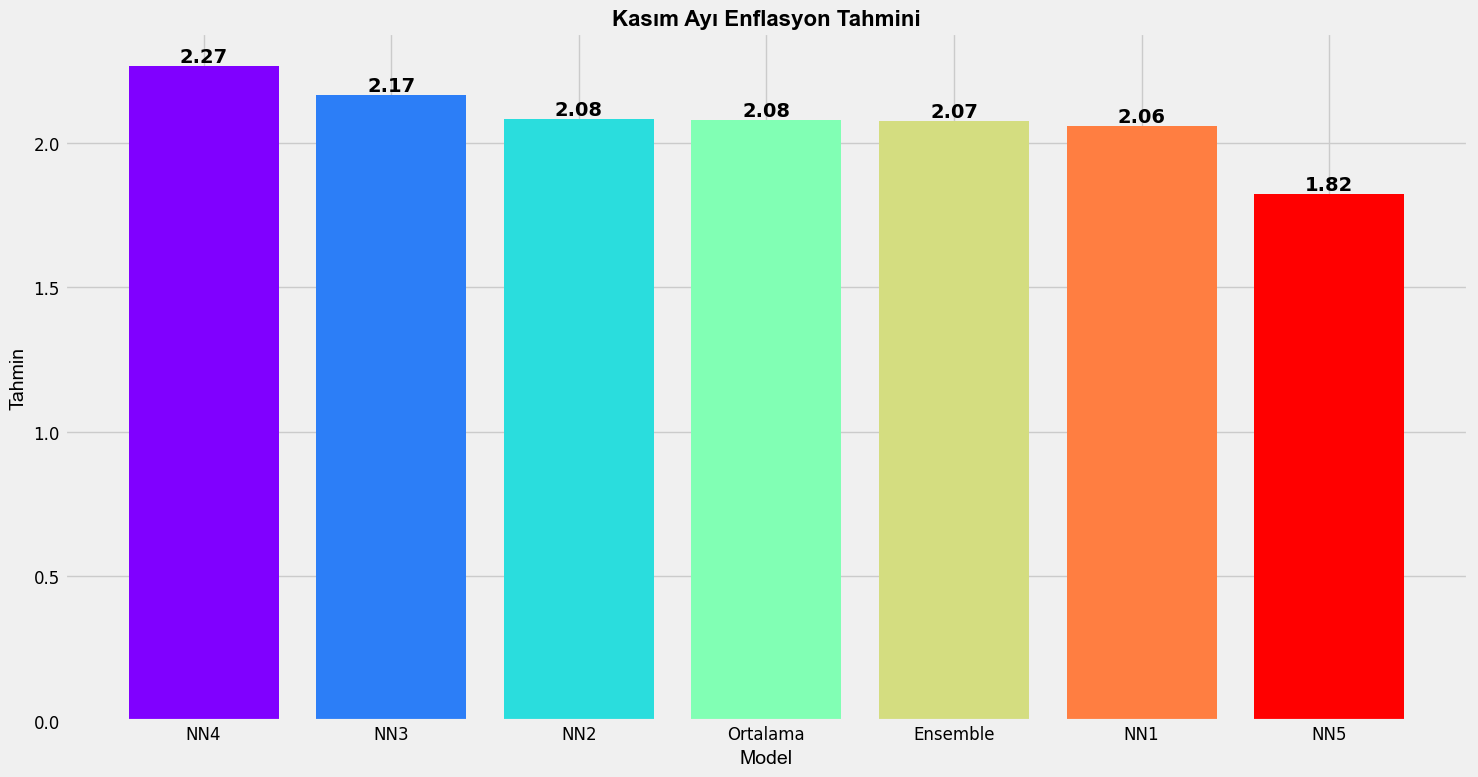

In [167]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from matplotlib.colors import Normalize

sorted_index = modelaylık.iloc[0, :].sort_values(ascending=False).index
sorted_modelaylık = modelaylık[sorted_index]

# Renk haritasını oluştur (Viridis yerine Rainbow kullanılacak)
colors = cm.rainbow(np.linspace(0, 1, len(sorted_modelaylık.columns)))

# Çubuk grafiği oluşturma
fig, ax = plt.subplots(figsize=(15, 8))

bars = ax.bar(
    sorted_modelaylık.columns,  # X ekseni
    sorted_modelaylık.iloc[0, :].values,  # Y ekseni
    color=colors  # Renk haritası
)

# Çubukların üzerine metin yerleştirme
for bar, value in zip(bars, sorted_modelaylık.iloc[0, :].values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X pozisyonu
        bar.get_height(),  # Y pozisyonu
        f'{value:.2f}',  # Yazılacak metin
        ha='center',  # Ortala
        va='bottom',  # Çubuğun üstüne yerleştir
        fontsize=14,
        color="black",
        fontweight="bold"
    )

# Başlık ve etiketler
ax.set_title("Kasım Ayı Enflasyon Tahmini", fontsize=16, fontweight='bold', fontfamily="Arial", color="black")
ax.set_ylabel("Tahmin", fontsize=14, fontfamily="Arial", color="black")
ax.set_xlabel("Model", fontsize=14, fontfamily="Arial", color="black")

# Eksendeki yazı tiplerini ayarlama
ax.tick_params(axis='x', labelsize=12, colors="black", labelrotation=0)
ax.tick_params(axis='y', labelsize=12, colors="black")

# Grafik düzenlemesi
plt.tight_layout()
plt.savefig("./monthlymodelforecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')


plt.show()

In [168]:
import pandas as pd
from datetime import datetime

# CSV dosyasını oku
csv_file = "C:/Users/Bora/Documents/GitHub/streamlit-inflation/cariay.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = kısatahminler["Ortalama"].iloc[-1]

try:
    df.loc[today_date] = new_tahmin
except:
    pass
df=df.loc["2024-11-05":]
df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2024-11-26 tarihli tahmin başarıyla eklendi.


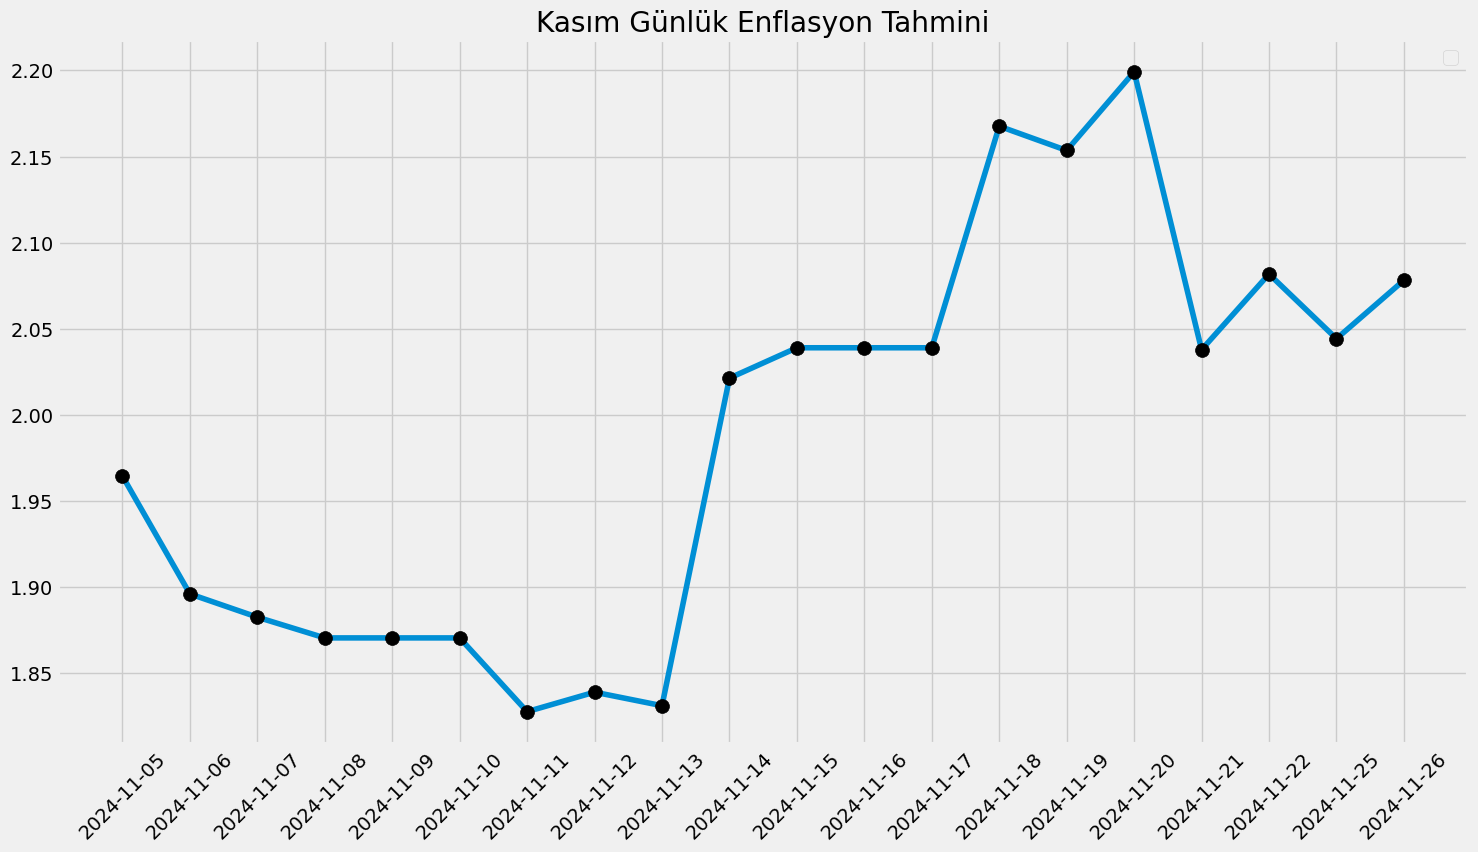

In [169]:
import matplotlib.pyplot as plt
from datetime import date
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.title("Kasım Günlük Enflasyon Tahmini")
plt.plot(df)
plt.scatter(x=df.index,y=df["Tahmin"],color="black",s=100,zorder=3)
plt.legend()
plt.tight_layout()
plt.xticks(df.index,rotation=45)
plt.savefig("./dailyforecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')

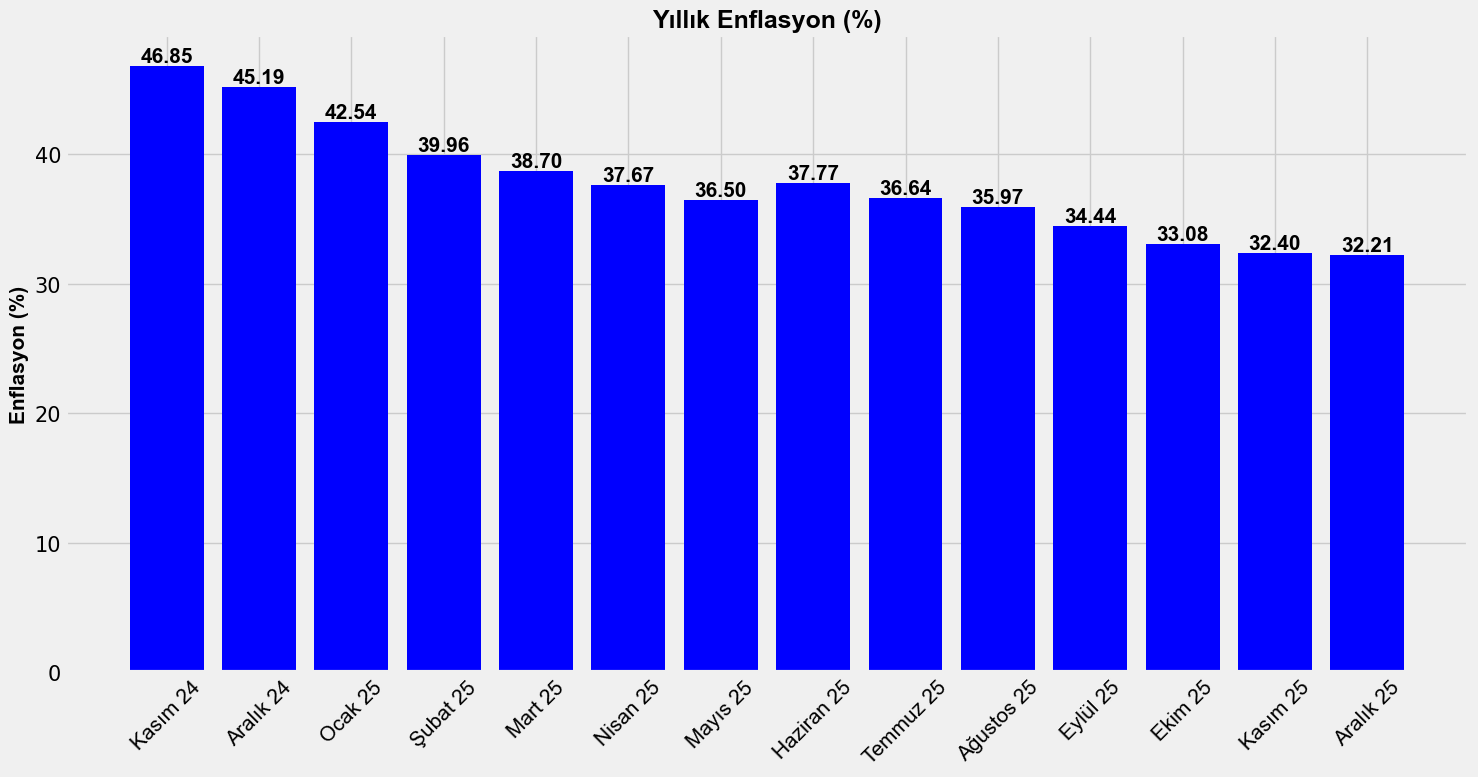

In [170]:

turkish_months = ["Kasım 24", "Aralık 24", "Ocak 25", "Şubat 25",
    "Mart 25", "Nisan 25", "Mayıs 25", "Haziran 25", "Temmuz 25", "Ağustos 25",
    "Eylül 25", "Ekim 25", "Kasım 25", "Aralık 25"
]

# Çubuk grafiği oluşturma
fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(
    turkish_months,
    yıllıktahmin1["Ortalama"].loc["2024-11-30":"2025-12-31"],
    color='blue'
)

# Barların üstüne değerleri yazma
for bar, value in zip(bars, yıllıktahmin1["Ortalama"].loc["2024-11-30":"2025-12-31"]):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X pozisyonu (barın ortası)
        bar.get_height(),  # Y pozisyonu (barın yüksekliği)
        f'{value:.2f}',  # Yazılacak metin (2 ondalık basamak)
        ha='center',  # Metni ortala
        va='bottom',  # Barın üst kısmına yerleştir
        fontsize=15,
        fontweight='bold',
        color='black',
        family="Arial"
    )

# X ekseni ayarları
ax.set_xticks(np.arange(len(turkish_months)))
ax.set_xticklabels(turkish_months, rotation=45, fontsize=15, color="black", fontfamily="Arial")

# Y ekseni ayarları
ax.set_ylabel("Enflasyon (%)", fontsize=15, fontweight='bold', color="black", fontfamily="Arial")
ax.tick_params(axis='y', labelsize=15, labelcolor='black')

# Başlık
ax.set_title("Yıllık Enflasyon (%)", fontsize=18, fontweight='bold', color="black", fontfamily="Arial")

# Grafik düzenlemesi
plt.tight_layout()
plt.savefig('forecast.png', bbox_inches='tight')
plt.savefig("./yearlyforecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()